# Домашнее задание № 2 Построение заявочной скоринговой модели
**Общая информация:**
- ⚡Дата выдачи: 26.02.2024
- ⏰ Мягкий дедлайн 23:59MSK 14.03.2024
- ⏰ Жесткий дедлайн 23:59MSK 24.03.2024
- ✍ работы должны быть высланы на почту maria.vorobyova.ser@gmail.com с темой HSE_CS_[направление]_ФИО, например HSE_CS_ПАД_ИВАНОВ_ИВАН_ИВАНОВИЧ

**Оценивание и штрафы:**

Максимальный балл за работу — 10 баллов. За каждый день просрочки снимается 0.2 балла. После жесткого дедлайна сдача невозможна.

Задание должно быть выполнено самостоятельно, «похожие» решения будут рассмотрены как "плагиат" и все похожие работы будут оценены баллом 0.

_Оценка будет снижена, если_ 
- нет комментариев 
- код написан плохо, непонятно
- сделаны неверные выводы

**Что нужно сделать?**

Необходимо построить модель, оценивающую вероятность дефолта клиента на стадии заведения кредитной заявки. Идти нужно строго по ноутбуку и выполнять задания каждого блока.

Перед началом выполнения работы необходимо скачать 2 датасета:
 - Данные с одобренными кредитными заявками [датасет](https://drive.google.com/file/d/1YUEMYCmvLs786AyIUV4l4NZg6k4Sb1cj/view?usp=share_link)
 - Данные с отказанными кредитными заявками [датасет](https://drive.google.com/file/d/1Q1YS4HKJVkTkIRTQsxSzutuKiM5mxUqx/view?usp=share_link)

Описание датасета:

1. target - целевая переменная (1- клиент достиг просрочку 90 дней в первый год кредита, 0 - иначе)
2. INCOME_TYPE - тип подтверждения дохода                
3. EDUCATION_  -  образование               
4. CUSTOMER_CATEGORY_  - категория клиента         
5. income   - доход клиента                  
6. DEPENDANT_NUMBER   - количество иждевенцев         
7. IS_EMPL    - это сотрудник банка                  
8. COUNT_ACTIVE_CREDIT_NO_CC  - количество октрытых кредитов без учета кредитных карт
9. CNT_MNTH_FROM_LAST_PMNT    - сколько месяцев прошло с момента последнего платежа по предудущему кредиту
10. age  - возраст клиента                     
11. experience  - стаж клиента               
12. inquiry_14_day   - количество запросов в бюро кредитных историй за последние 14 дней          
13. inquiry_21_day   - количество запросов в бюро кредитных историй за последние 21 день                  
14. count_mnth_act_passport - сколько месяцев прошло с момента выдачи выдачи паспорта     
15. UID  - ID заявки    

Желаем вам удачи!✌

Ссылка на слайды [семинара](https://docs.google.com/presentation/d/1GA9rM8E_WOItnjc_Ikj93gJfoylP42b4/edit?usp=sharing&ouid=110376101452807962761&rtpof=true&sd=true)

In [967]:
# import библиотек
import pandas as pd
import numpy as np

# чтобы отобразить больше столбцов и строк
# pd.options.display.max_rows = 50
pd.options.display.max_columns = 200

import warnings
warnings.filterwarnings('error')


# для работы с датами, временем
from datetime import timedelta
import datetime as dt

# для построения графиков
import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
import seaborn as sns

In [968]:
# считать данные
accept = pd.read_csv('accept.csv')
reject = pd.read_csv('reject.csv')
accept.columns = [col.lower() for col in accept.columns]
reject.columns = [col.lower() for col in reject.columns]

# Explatory Data Analysis. Максимально - 2 балла

- 0 баллов, если задание не выполнено
- 1 балл, если посчитаны статистики,есть какие-то графики (важно, ПОЛЕЗНЫЕ графики), но не сделаны выводы
- 2 балла, если посчитаны статистики и есть графики (важно, ПОЛЕЗНЫЕ графики) и сделаны ВЫВОДЫ (важно, что выводы правильные)

In [969]:
accept

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
0,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
2,0,2NDFL,advanced,NaN,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,NaN,NaN,7.972678,15
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,NaN,90000.0,0.0,0,0.0,10.693705,40.642922,4.847840,0.0,0.0,11.528767,138843
32550,1,OTHER,advanced,NaN,60000.0,0.0,0,1.0,0.891062,28.163934,3.329927,1.0,1.0,7.242256,139153
32551,1,OTHER,advanced,NaN,45000.0,0.0,0,0.0,0.301770,30.703810,1.418879,1.0,1.0,9.325728,139154
32552,1,OTHER,advanced,Corporate,40000.0,0.0,0,NaN,NaN,29.716581,5.363156,NaN,NaN,6.935759,140165


In [970]:
# Посмотрим на уникальные значения для каждой переменной, чтобы определиться с их типами и обнаружить возможные проблемы
accept_unique_values = {}

for column in accept.columns:
    accept_unique_values[column] = accept[column].unique()

accept_unique_values

{'target': array([0, 1], dtype=int64),
 'income_type': array(['2NDFL', 'OTHER'], dtype=object),
 'education_': array(['elementary', 'advanced', 'high', 'beginner'], dtype=object),
 'customer_category_': array([nan, 'Corporate', 'VIP'], dtype=object),
 'income': array([ 56245., 119510.,  12020., ...,   8120.,  29723.,  30332.]),
 'dependant_number': array([ 0.,  1.,  2., nan,  4.,  3.]),
 'is_empl': array([0, 1], dtype=int64),
 'count_active_credit_no_cc': array([nan,  1.,  0.,  2.,  6.,  3.,  5.,  4.,  7.,  8.]),
 'cnt_mnth_from_last_pmnt': array([        nan,  1.115569  ,  0.30378584, ..., 10.6937052 ,
         0.89106183,  0.30176971]),
 'age': array([50.56712329, 28.19178082, 36.43774235, ..., 30.70381017,
        29.71658058, 25.03440377]),
 'experience': array([ 2.13150685,  2.03287671, 17.73150685, ...,  1.41887866,
         5.36315592,  1.82070514]),
 'inquiry_14_day': array([nan,  1.,  0.,  2.,  5.,  3.,  4.,  6.]),
 'inquiry_21_day': array([nan,  1.,  0.,  2.,  5.,  3.,  4.,  

In [971]:
# NaN в переменных 'inquiry_14_day', 'inquiry_21_day' означает, что запросов не было, поэтому заменяем на 0
accept[['inquiry_14_day', 'inquiry_21_day']] = accept[['inquiry_14_day', 'inquiry_21_day']].replace(np.NaN, 0)

In [972]:
accept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32554 entries, 0 to 32553
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     32554 non-null  int64  
 1   income_type                32554 non-null  object 
 2   education_                 32554 non-null  object 
 3   customer_category_         13095 non-null  object 
 4   income                     31901 non-null  float64
 5   dependant_number           32514 non-null  float64
 6   is_empl                    32554 non-null  int64  
 7   count_active_credit_no_cc  24190 non-null  float64
 8   cnt_mnth_from_last_pmnt    22409 non-null  float64
 9   age                        32554 non-null  float64
 10  experience                 32507 non-null  float64
 11  inquiry_14_day             32554 non-null  float64
 12  inquiry_21_day             32554 non-null  float64
 13  count_mnth_act_passport    32554 non-null  flo

In [973]:
accept[['is_empl', 'dependant_number']] = accept[['is_empl', 'dependant_number']].astype(object)
accept.dtypes 
# Видим, что некоторые категориальные переменные были восприняты как количественные, поэтому меняем тип данных

target                         int64
income_type                   object
education_                    object
customer_category_            object
income                       float64
dependant_number              object
is_empl                       object
count_active_credit_no_cc    float64
cnt_mnth_from_last_pmnt      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
uid                            int64
dtype: object

In [974]:
accept_nan = accept.isnull().sum().to_frame() # Пропущенные значения
percent_accept_nan = ((accept_nan.T/len(accept)).T)*100
percent_accept_nan = percent_accept_nan.rename(columns = {0:'Percent_accept_NaN'})

In [975]:
nan_1 = accept_nan.join(percent_accept_nan).rename(columns = {0:'Accept_NaN'})

In [976]:
accept_null = accept[accept==0].count().to_frame() # Нулевые значения
percent_accept_null = ((accept_null.T/len(accept)).T)*100
percent_accept_null = percent_accept_null.rename(columns = {0:'Percent_accept_null'})

In [977]:
null_1 = accept_null.join(percent_accept_null).rename(columns = {0:'Accept_Null'})

In [978]:
nan_1.join(null_1)

,Accept_NaN,Percent_accept_NaN,Accept_Null,Percent_accept_null
target,0,0.000000,31857,97.858942
income_type,0,0.000000,0,0.000000
education_,0,0.000000,0,0.000000
customer_category_,19459,59.774528,0,0.000000
income,653,2.005898,4,0.012287
dependant_number,40,0.122873,32355,99.388708
is_empl,0,0.000000,19853,60.984825
count_active_credit_no_cc,8364,25.692695,12273,37.700436
cnt_mnth_from_last_pmnt,10145,31.163605,13,0.039934
age,0,0.000000,0,0.000000


Посчитали нулевые и пропущенные значения для принятых заявок:
* Среди категориальных переменных больше всего пропусков обнаружено у customer_category_ (60%). Чтобы не удалять больше половины выборки, в дальнейшем заменим пропущенные значения на Unknown category;

* Также около 30% пропусков видим у количественных переменных count_active_credit_no_cc и cnt_mnth_from_last_pmnt;

* По большей части количества нулевых значений для переменных не вызывают вопросов: в категориальных 0 обозначает одну из категорий, в переменных, отвечающих за количество кредитов, 0 - отсутствие кредитов, в переменных запросов 0 - это отсутствие запросов. 



In [979]:
accept.shape # Длина нашего датасета - 32554 строки

(32554, 15)

In [980]:
accept.describe(include = 'all')

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
count,32554.000000,32554,32554,13095,3.190100e+04,32514.0,32554.0,24190.000000,22409.000000,32554.000000,32507.000000,32554.000000,32554.000000,32554.000000,32554.000000
unique,NaN,2,4,2,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,OTHER,elementary,Corporate,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21863,21330,12710,NaN,32355.0,19853.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.021411,NaN,NaN,NaN,6.133177e+04,NaN,NaN,0.661926,20.856970,36.432497,4.889609,0.259661,0.305339,7.250201,70630.132795
std,0.144751,NaN,NaN,NaN,1.069330e+05,NaN,NaN,0.835298,143.422108,8.219484,5.344778,0.542940,0.611307,3.341657,40512.136053
min,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,-66.559028,25.000187,-157.184939,0.000000,0.000000,-0.019126,10.000000
25%,0.000000,NaN,NaN,NaN,2.677800e+04,NaN,NaN,0.000000,0.530578,29.507145,1.241436,0.000000,0.000000,4.996845,35821.750000
50%,0.000000,NaN,NaN,NaN,4.146300e+04,NaN,NaN,0.000000,0.928136,34.734015,3.279452,0.000000,0.000000,7.780822,70762.000000
75%,0.000000,NaN,NaN,NaN,7.000000e+04,NaN,NaN,1.000000,3.667899,42.200724,6.479452,0.000000,0.000000,9.912598,105834.250000


In [981]:
accept['count_mnth_act_passport'].min()
# Видим, что у переменной, отвечающей за количество месяцев, минимум отрицательный. 
# По смыслу такого быть не может, поэтому оставляем только значения >=0

-0.019125683

In [982]:
accept['count_mnth_act_passport'].max()

15.616438356

In [983]:
accept['experience'].min()
# Видим, что у переменной, отвечающей за опыт (в годах), минимум отрицательный. 
# По смыслу такого быть не может, поэтому оставляем только значения >=0

-157.184939

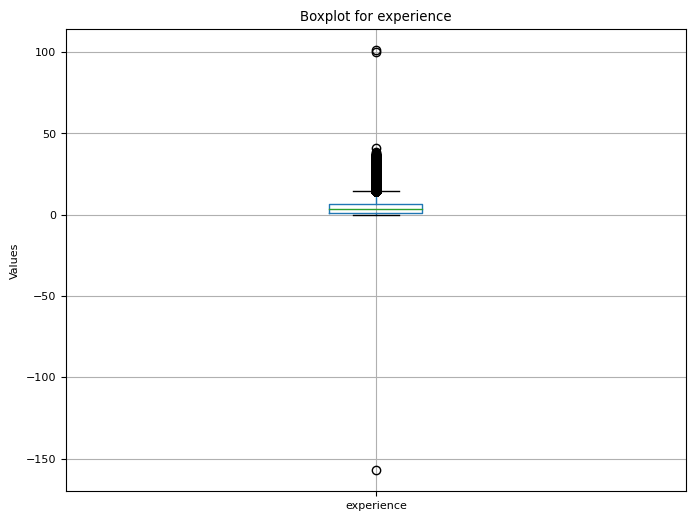

In [984]:
accept['experience'].max() # 101 год стажа физически невозможен
plt.figure(figsize=(8, 6)) # По ящику с усами видим сильные выбросы: минимальные значения и значения больше 60
accept.boxplot(column='experience')
plt.title('Boxplot for experience')
plt.ylabel('Values')
plt.show();

In [985]:
accept['cnt_mnth_from_last_pmnt'].min()
# Видим, что у переменной, отвечающей за количество месяцев, минимум отрицательный. 
# По смыслу такого быть не может, поэтому оставляем только значения >=0

-66.55902778

In [986]:
accept['cnt_mnth_from_last_pmnt'].value_counts()

cnt_mnth_from_last_pmnt
 1.000000     340
 2.000000      28
 4.000000      16
 3.000000      14
 0.000000      13
             ... 
-0.241219       1
 6.860103       1
 14.473634      1
 0.606877       1
 0.301770       1
Name: count, Length: 17259, dtype: int64

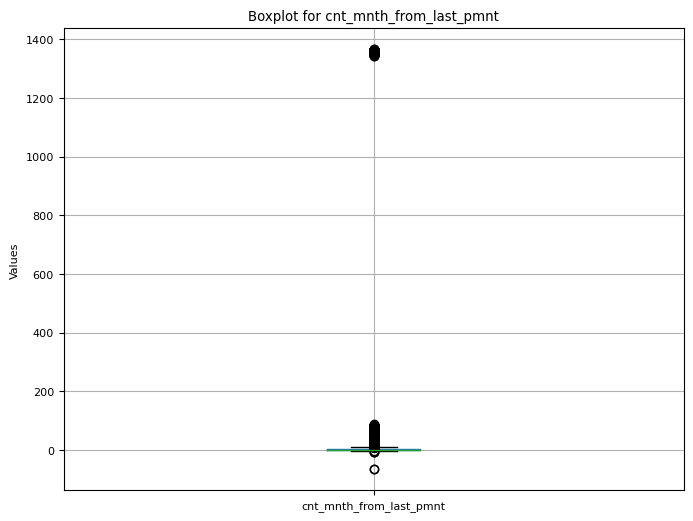

In [987]:
accept['cnt_mnth_from_last_pmnt'].max()
plt.figure(figsize=(8, 6)) 
# По ящику с усами видим сильные выбросы
# Подавляющее большинство значений: 1
# Выбросы со значениями выше 60 сильно выбиваются на общем фоне
accept.boxplot(column='cnt_mnth_from_last_pmnt')
plt.title('Boxplot for cnt_mnth_from_last_pmnt')
plt.ylabel('Values')
plt.show();

In [988]:
# Исходя из ящиков с усами было решено отфильтровать значения, заменив эстремальные значения на пропуски
# Заменяем на пропуски, так как значения выбросов не соответствуют реальности и могут только исказить результаты
for col in ['count_mnth_act_passport', 'experience', 'cnt_mnth_from_last_pmnt']:
  accept[col]=accept[col].map(lambda x: x if x>0 and x<60 else np.NaN)

In [989]:
accept.describe(include = 'all') # Проверяем, что после обработки выбросов значения статистик изменились

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
count,32554.000000,32554,32554,13095,3.190100e+04,32514.0,32554.0,24190.000000,21403.000000,32554.000000,32504.000000,32554.000000,32554.000000,32547.000000,32554.000000
unique,NaN,2,4,2,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,OTHER,elementary,Corporate,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21863,21330,12710,NaN,32355.0,19853.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.021411,NaN,NaN,NaN,6.133177e+04,NaN,NaN,0.661926,5.026913,36.432497,4.888695,0.259661,0.305339,7.251761,70630.132795
std,0.144751,NaN,NaN,NaN,1.069330e+05,NaN,NaN,0.835298,10.165064,8.219484,5.214919,0.542940,0.611307,3.340323,40512.136053
min,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,0.044288,25.000187,0.065753,0.000000,0.000000,0.002740,10.000000
25%,0.000000,NaN,NaN,NaN,2.677800e+04,NaN,NaN,0.000000,0.538530,29.507145,1.241491,0.000000,0.000000,4.998570,35821.750000
50%,0.000000,NaN,NaN,NaN,4.146300e+04,NaN,NaN,0.000000,0.928651,34.734015,3.279452,0.000000,0.000000,7.781421,70762.000000
75%,0.000000,NaN,NaN,NaN,7.000000e+04,NaN,NaN,1.000000,3.261122,42.200724,6.479452,0.000000,0.000000,9.912827,105834.250000


In [990]:
accept['target'].value_counts()

target
0    31857
1      697
Name: count, dtype: int64

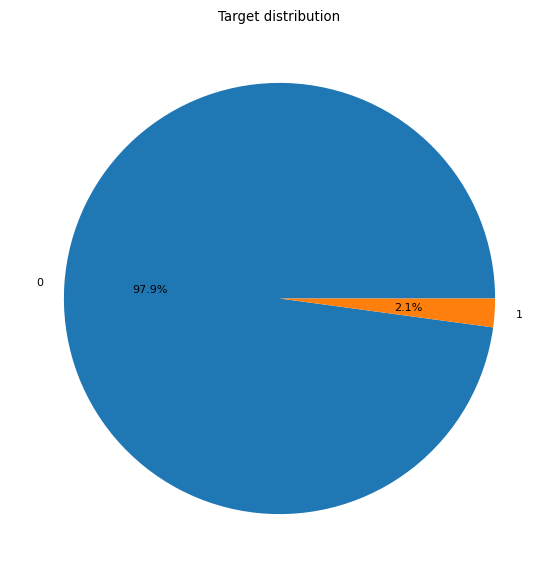

In [991]:
plt.figure(figsize = (7,7))
plt.pie(accept['target'].value_counts(), 
        labels = accept['target'].value_counts().index, 
        autopct='%1.1f%%')
plt.title('Target distribution');

Посмотрим на распределение целевой переменной: наблюдается сильно выраженный дисбаланс классов.

In [992]:
accept.groupby('income_type', as_index=False).agg({'target':'mean'})
# Видим, что степень дефолтности сильно зависит от income_type (различие: 0.005, что уже много для данной переменной)
# Риск дефолта выше для клиентов с иным типом подтверждения дохода

,income_type,target
0,2NDFL,0.018053
1,OTHER,0.023053


In [993]:
accept.groupby('education_', as_index=False).agg({'target':'mean'})
# Видим, что вероятность дефолта выше у клиентов с высшим образованием
# Это может быть связано с тем, что доходы таких клиентов больше, и банк может выдать им большую сумму кредита
# В случае невыполнения обязательств это грозит большей потерей средств для банка

,education_,target
0,advanced,0.025461
1,beginner,0.019035
2,elementary,0.019691
3,high,0.026016


In [994]:
accept.groupby('count_active_credit_no_cc', as_index=False).agg({'target':'mean'})
# Чем больше кредитов, тем выше вероятность дефолта, что логично

,count_active_credit_no_cc,target
0,0.0,0.014829
1,1.0,0.019235
2,2.0,0.030994
3,3.0,0.039640
4,4.0,0.044586
5,5.0,0.093023
6,6.0,0.090909
7,7.0,0.083333
8,8.0,0.333333


In [995]:
accept.groupby('is_empl', as_index=False).agg({'target':'mean'})
# У сотрудников банка ниже вероятность дефолта
# Это может быть вызвано тем, что они обладают определенными знаниями согласно специфике своей работы

,is_empl,target
0,0,0.032791
1,1,0.003622


In [996]:
accept.groupby('target')['age'].mean()
# Возраст практически не оказывает влияния на вероятность дефолта

target
0    36.42993
1    36.54982
Name: age, dtype: float64

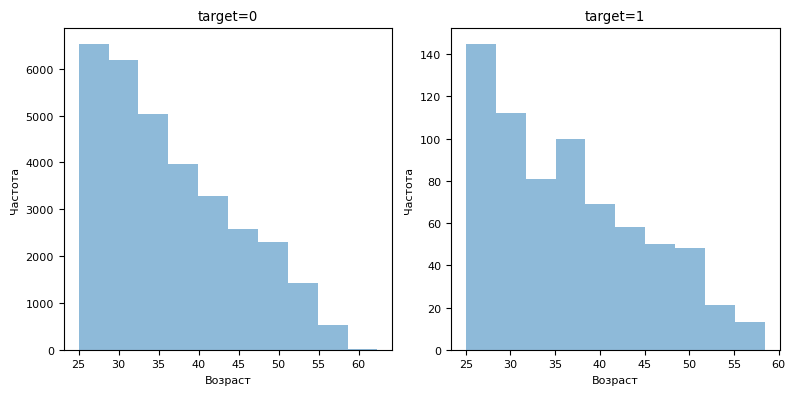

In [997]:
grouped_accept = accept.groupby('target')
# Создайте две гистограммы рядом
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for (group, subset), ax in zip(grouped_accept, axes):
    ax.hist(subset['age'], bins=10, alpha=0.5)
    ax.set_title(f'target={group}')
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()


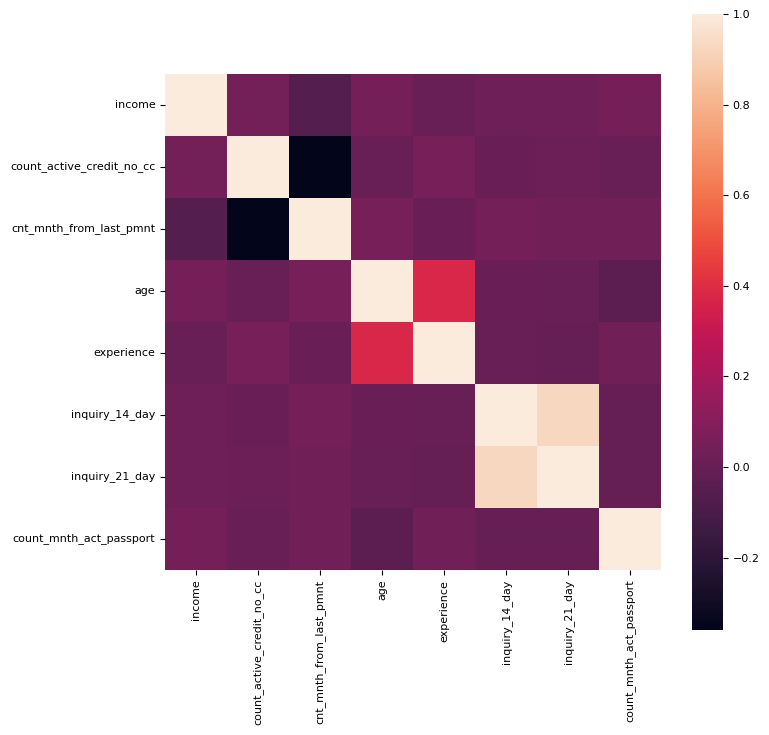

In [998]:
# матрица корреляций
plt.figure(figsize=(8, 8))
sns.heatmap(accept.select_dtypes(include=['float64']).corr(), square=True)
plt.show()

Посмотрим на матрицу корреляций:

* Наиболее сильно из представленных переменных связаны запросы, что понятно, ведь эти переменные как бы вложены одна в другую: если у клиента есть запросы за 21 день, то и за 14 дней они тоже будут;

* Также довольно сильно коррелируют возраст и стаж, что тоже объяснимо: если человек постоянно с определенного возраста работает, то, чем старше он становится, тем больше его стаж.

# Создание дополнительных переменных. Максимально - 1 балл

Будьте креативными, чем больше переменных, тем больше балл! При этом переменные должны быть логичными, нелогичные переменные не принимаются

- 0 баллов, если задание не выполнено
- 0.5 баллов - создана 2 дополнительные переменные 
- 1 балл создано больше 3 переменных 


In [999]:
# Создаем переменную, отвечающую за соотношение стажа и возраста.
# Можно предположить, что чем больше это соотношение, тем клиент надежнее и тем более предпочтителен он для банка.
accept['ratio_experience'] = accept['experience']/accept['age']

In [1000]:
accept['customer_category_'].replace(np.NaN, 'Unknown category', inplace = True)

In [1001]:
# Создаем переменную, отвечающую за отношение дохода к среднему по категории
# С помощью этой переменной банк сможет понять, как клиент выглядит на фоне других из своей категории,
# насколько он более или менее предпочтителен.
groups = accept['income'].groupby(accept['customer_category_']).mean()
groups

customer_category_
Corporate            58565.916496
Unknown category     58227.586211
VIP                 306867.540682
Name: income, dtype: float64

In [1002]:
def f(data):
    if data['customer_category_'] == 'Corporate':
        val = data['income']/groups[0]
    elif data['customer_category_'] == 'Unknown category':
        val = data['income']/groups[1]
    else :
        val = data['income']/groups[2]
    return val

accept['ratio_income'] = accept.apply (f, axis=1)
accept

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income
0,0,2NDFL,elementary,Unknown category,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,0.0,0.0,5.536986,10,0.042152,0.965951
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11,0.072109,2.040607
2,0,2NDFL,advanced,Unknown category,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13,0.486625,0.206431
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,0.0,0.0,7.972678,15,0.051346,0.369003
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17,0.015813,0.478516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,Unknown category,90000.0,0.0,0,0.0,10.693705,40.642922,4.847840,0.0,0.0,11.528767,138843,0.119279,1.545659
32550,1,OTHER,advanced,Unknown category,60000.0,0.0,0,1.0,0.891062,28.163934,3.329927,1.0,1.0,7.242256,139153,0.118234,1.030439
32551,1,OTHER,advanced,Unknown category,45000.0,0.0,0,0.0,0.301770,30.703810,1.418879,1.0,1.0,9.325728,139154,0.046212,0.772830
32552,1,OTHER,advanced,Corporate,40000.0,0.0,0,NaN,NaN,29.716581,5.363156,0.0,0.0,6.935759,140165,0.180477,0.682991


In [1003]:
# Создаем переменную, отвечающую за свободный доход у клиента.
# Чем больше иждивенцев, тем больше расходы на них.
# Тем меньшая часть средств остается на выполнение обязательств, что повышает риск дефолта.
accept['free_income'] = (accept['income']/(accept['dependant_number'] + 1)).astype(float)

In [1004]:
# Создаем переменную, отвечающую за отношение открытых кредитов к возрасту.
# Чем моложе клиент, тем более он ненадежный для банка (может еще не быть семьи, которая поможет с выплатами, поиск постоянного места работы и тд.)
# Соответственно, чем больше его долговая нагрузка, тем риск дефолта выше.
accept['ratio_credit'] = accept['count_active_credit_no_cc']/(accept['age'])


In [1005]:
accept.describe()

,target,income,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income,free_income,ratio_credit
count,32554.000000,3.190100e+04,24190.000000,21403.000000,32554.000000,32504.000000,32554.000000,32554.000000,32547.000000,32554.000000,32504.000000,31901.000000,3.190000e+04,24190.000000
mean,0.021411,6.133177e+04,0.661926,5.026913,36.432497,4.888695,0.259661,0.305339,7.251761,70630.132795,0.128936,1.000000,6.116078e+04,0.018930
std,0.144751,1.069330e+05,0.835298,10.165064,8.219484,5.214919,0.542940,0.611307,3.340323,40512.136053,0.119264,1.545642,1.068613e+05,0.024652
min,0.000000,0.000000e+00,0.000000,0.044288,25.000187,0.065753,0.000000,0.000000,0.002740,10.000000,0.001370,0.000000,0.000000e+00,0.000000
25%,0.000000,2.677800e+04,0.000000,0.538530,29.507145,1.241491,0.000000,0.000000,4.998570,35821.750000,0.036351,0.454578,2.666150e+04,0.000000
50%,0.000000,4.146300e+04,0.000000,0.928651,34.734015,3.279452,0.000000,0.000000,7.781421,70762.000000,0.094492,0.699912,4.134300e+04,0.000000
75%,0.000000,7.000000e+04,1.000000,3.261122,42.200724,6.479452,0.000000,0.000000,9.912827,105834.250000,0.183493,1.171142,6.999925e+04,0.031617
max,1.000000,1.145038e+07,8.000000,59.985685,62.320548,40.804791,6.000000,8.000000,15.616438,140901.000000,0.731880,196.648681,1.145038e+07,0.266927


# Построение модели на одобренных заявках. Максимально - 4 балла
Необхоимо построить логистическую регрессию на WoE переменных. 

Если построена любая другая модель, балл = 0

In [1006]:
accept.dtypes

target                         int64
income_type                   object
education_                    object
customer_category_            object
income                       float64
dependant_number              object
is_empl                       object
count_active_credit_no_cc    float64
cnt_mnth_from_last_pmnt      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
uid                            int64
ratio_experience             float64
ratio_income                 float64
free_income                  float64
ratio_credit                 float64
dtype: object

In [1007]:
# вещественные переменные
interval_features = accept.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('target') # Убираем целевую переменную
interval_features.remove('uid') # Убираем техническую переменную
interval_features

['income',
 'count_active_credit_no_cc',
 'cnt_mnth_from_last_pmnt',
 'age',
 'experience',
 'inquiry_14_day',
 'inquiry_21_day',
 'count_mnth_act_passport',
 'ratio_experience',
 'ratio_income',
 'free_income',
 'ratio_credit']

In [1008]:
# категориальные переменные
categorical_features = accept.select_dtypes(include=['object']).columns.tolist()
categorical_features

['income_type',
 'education_',
 'customer_category_',
 'dependant_number',
 'is_empl']

Необходимо расчитать WoE преобразование - максимально - 3 балла



Расчет WoE должен быть в 2 этапа:

1 шаг. Fine Classing (1 балл). Разбиение на большое количество бинов(интервалов)
  - обычно интервальные переменные делят по  20, 30 и так далее интервалов
  - для категориальных переменных - одна категория - одна группа
  - далее для каждой группы рассчитываем WoE

2 шаг. Coarse classing (2 балла). Укрупнение интервалов, которые получены на 1-ом шаге. В итоге должно получится не больше 5-10 интервалов. 
  - Обычно объединяют группы с похожими значениями WoE 
  - WoE должен быть монотонным, то есть после вашего объединения результат должен быть интерпретируемым (необходимо продемонстрировать графически, что WoE монотонен )



In [1009]:
def calculate_woe_iv(dataset, feature, target):
    print(feature)
    values_counts = dataset[feature].value_counts(dropna=False)

    lst = []
    for val in values_counts.index:
        lst.append({
            'Value': val,
            'All': values_counts[val],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()

    # Добавим псевдоконстанту, чтобы избежать деления на 0
    dset['Distr_Bad'] = np.where(dset['Distr_Bad'] == 0, 0.0001, dset['Distr_Bad'])
    dset['Distr_Good'] = np.where(dset['Distr_Good'] == 0, 0.0001, dset['Distr_Good'])

    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])

    # Замените значения inf на 0
    dset.replace({'WoE': {np.inf: 0, -np.inf: 0}}, inplace=True)

    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    dset = dset.sort_values(by='WoE')

    return dset, iv

In [1010]:

# Интервальные переменные делим на 30 бинов
for feature in interval_features:
    accept[feature + '_bin'] = pd.qcut(accept[feature], 30, duplicates='drop')
    accept[feature + '_bin'] = accept[feature + '_bin'].cat.add_categories(0).fillna(0)

# В категориальных пропуски заменяем на новую категорию 
for feature in categorical_features:
    accept[feature] = accept[feature].fillna("UNK")


# Разделим на трейн и тест

In [1011]:
# Делим принятые заявки на трейн (70%) и тест (30%)
train, test = train_test_split(accept,
                               test_size=0.3,
                               random_state=17,
                               stratify=accept['target'])

In [1012]:
# Смотрим, как сильно отличаются средние для таргета по трейну и тесту 
train['target'].mean()

0.021415719489182427

In [1013]:
test['target'].mean()
# Видим, что средние отличаются незначительно
# Проверили для того, чтобы убедиться, что классы перемешаны и равномерно распределены по подвыборкам

0.021398587078939286

In [1014]:
scorecard_fine = pd.DataFrame() # Создаем пустую скоркарту для fine classing

In [1015]:
for feature in interval_features:

    # Рассчитываем WoE на тренировочной выборке
    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})

    train = train.drop(columns = [feature, feature + '_bin', 'Value']) 

    # Применяем результаты на тестовой выборке
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})


    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard_fine = pd.concat([scorecard_fine, df[['feature', 'Value', 'WoE']]])
    print('feature', feature, '  IV= ',iv)

income_bin
feature income   IV=  0.36530291315624625
count_active_credit_no_cc_bin
feature count_active_credit_no_cc   IV=  0.1376090002674486
cnt_mnth_from_last_pmnt_bin
feature cnt_mnth_from_last_pmnt   IV=  0.23467324389333516
age_bin
feature age   IV=  0.0675121414354313
experience_bin
feature experience   IV=  0.5789634526977647
inquiry_14_day_bin
feature inquiry_14_day   IV=  0.0672093791563272
inquiry_21_day_bin
feature inquiry_21_day   IV=  0.07906637221870336
count_mnth_act_passport_bin
feature count_mnth_act_passport   IV=  0.1120259097431738
ratio_experience_bin
feature ratio_experience   IV=  0.5551147809093947
ratio_income_bin
feature ratio_income   IV=  0.3488727960987896
free_income_bin
feature free_income   IV=  0.35084170420263794
ratio_credit_bin
feature ratio_credit   IV=  0.1893830941928018


In [1016]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    
    train = train.drop(columns = [feature, 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    
    test = test.drop(columns = [feature, 'Value'])
    
    scorecard_fine = pd.concat([scorecard_fine, df[['feature', 'Value', 'WoE']]])


    print('feature', feature, '  IV= ',iv)
    

income_type
feature income_type   IV=  0.01156523241841005
education_
feature education_   IV=  0.020121950916274327
customer_category_
feature customer_category_   IV=  0.5505929544283652
dependant_number
feature dependant_number   IV=  0.4501731539801788
is_empl
feature is_empl   IV=  0.7773330102889798


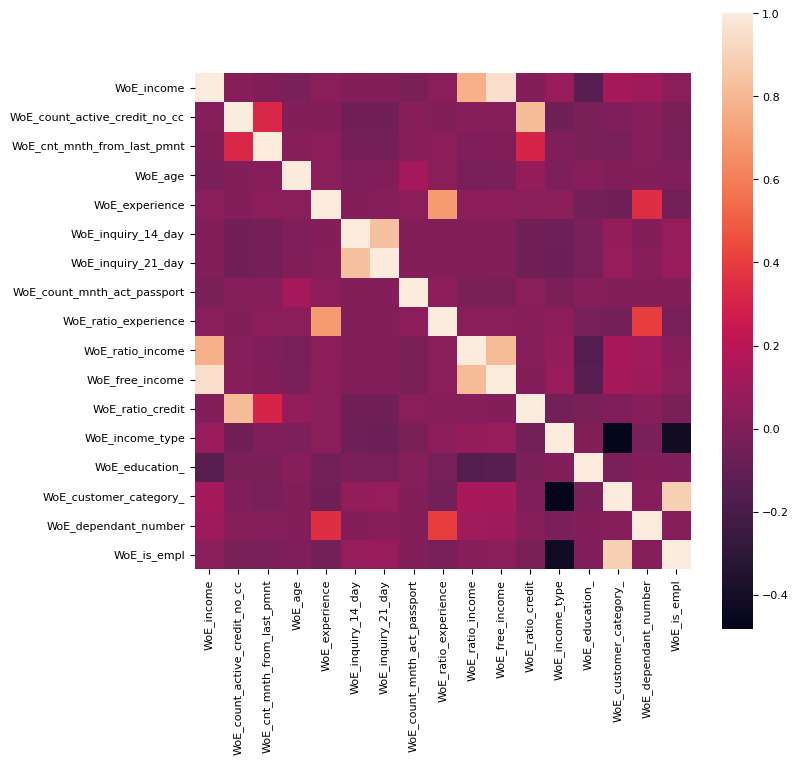

In [1017]:
# импорт библиотек для графиков
# матрица корреляций
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True)
plt.show()

Нужно удалить одну из коррелирующих переменных, у которой IV меньше

In [1018]:
features = test.columns.tolist()
features.remove('uid')
features.remove('target')
# исключаем, так как IV<0.02
features.remove('WoE_income_type')
features.remove('WoE_age')

# исключим inquiry_14_day, так inquiry_14_day коррелирует с inquiry_21_day,
# при этом IV у inquiry_21_day выше
features.remove('WoE_inquiry_14_day')

# исключаем WoE_CUSTOMER_CATEGORY_, так как коррелирует с WoE_is_EMPL
# при этом IV у WoE_is_EMPL выше
features.remove('WoE_customer_category_')

# исключаем, так как коррелирует experience с ratio_experience
features.remove('WoE_ratio_experience')
# при этом IV у experience выше
# исключаем, так как коррелирует income с ratio_income, у income IV больше
features.remove('WoE_ratio_income')
# исключаем, так как коррелирует с ratio_credit и у ratio_credit IV больше
features.remove('WoE_count_active_credit_no_cc')
# исключаем, так как коррелирует income с free_income, у income IV больше
features.remove('WoE_free_income')

features


['WoE_income',
 'WoE_cnt_mnth_from_last_pmnt',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_ratio_credit',
 'WoE_education_',
 'WoE_dependant_number',
 'WoE_is_empl']

In [1019]:
train[features] # Регрессию строим на тренировочной выборке

,WoE_income,WoE_cnt_mnth_from_last_pmnt,WoE_experience,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_ratio_credit,WoE_education_,WoE_dependant_number,WoE_is_empl
0,-0.099464,-0.335627,-0.163833,0.073359,0.024169,-0.382633,0.091406,0.067363,-0.443754
1,-0.099464,-0.335627,-0.163833,0.073359,0.024169,-0.382633,0.091406,0.067363,-0.443754
2,-0.099464,-0.442589,0.094033,0.073359,0.850847,-0.382633,0.091406,0.067363,-0.443754
3,-0.099464,-0.442589,0.094033,0.073359,0.850847,-0.382633,0.091406,0.067363,-0.443754
4,-0.099464,0.036641,0.094033,0.073359,-0.002897,-0.382633,0.091406,0.067363,-0.443754
...,...,...,...,...,...,...,...,...,...
22782,0.431264,-0.216825,-0.108410,0.073359,-0.094950,-0.293523,0.091406,-7.223179,1.867364
22783,-1.556438,-0.216825,-0.153036,0.073359,0.016126,-0.293523,0.091406,-7.223179,1.867364
22784,-1.556438,0.099992,-0.369926,0.073359,-0.307726,-0.382633,-0.202383,-7.223179,1.867364
22785,-1.556438,-0.429153,-0.153036,0.073359,0.299762,-0.855237,-0.202383,-7.223179,1.867364


In [1020]:
test[features]

,WoE_income,WoE_cnt_mnth_from_last_pmnt,WoE_experience,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_ratio_credit,WoE_education_,WoE_dependant_number,WoE_is_empl
0,-0.099464,-0.108410,1.167089,0.073359,0.155026,0.392309,-0.202383,0.067363,-0.443754
1,-0.099464,1.265615,0.856173,0.073359,-0.002897,0.392309,-0.202383,0.067363,-0.443754
2,-0.099464,-0.108410,0.094033,0.073359,0.155026,0.392309,-0.202383,0.067363,-0.443754
3,0.321153,-0.098298,0.856173,0.073359,-0.307726,0.392309,-0.202383,0.067363,-0.443754
4,0.321153,0.099992,-0.194978,0.073359,0.850847,0.392309,-0.202383,0.067363,-0.443754
...,...,...,...,...,...,...,...,...,...
9762,0.321153,0.754789,-0.369926,0.073359,0.298410,0.392309,0.091406,-0.501753,1.867364
9763,0.321153,0.099992,0.323795,-0.718979,-0.002897,-0.855237,0.091406,-0.501753,1.867364
9764,-0.242638,-0.335627,-0.039130,0.073359,0.016126,0.392309,0.091406,-0.730939,1.867364
9765,0.109844,0.099992,-0.039130,0.073359,-0.094950,0.215793,0.091406,-0.730939,1.867364


# Coarse classing


Для вещественной переменной мы не можем объединить промежуток в начале и в конце. 

Объединяем промежутки, которые идут по порядку и отличаются на 20-40%.

Можем удалить какую-то переменную, если WoE ведет себя нелогично.


In [1021]:
scorecard_fine['features'] = 'WoE_'+scorecard_fine['feature'].astype(str)
scorecard_fine = scorecard_fine.drop(columns = 'features')
scorecard_fine['Value'] = scorecard_fine['Value'].replace(0, pd.Interval(0,0)) 
# В Value значения - это интервалы, но также есть 0, которые заменяют пропуски
# Чтобы при подсчете WoE не возникало ошибок делаем нули интервалами (0,0)


Написала функцию, которая принимает на вход значения Value и WoE для переменной из скоркарты, а также порог, преобразует интервалы в нужный тип и создает новую колонку 'category', где 1 соответствует интервалу, где разница между WoE меньше порога, 0 - больше порога.

In [1022]:
def apply_interval_sorting(scorecard_fine, feature_name, columns, threshold):
    coarse_feature = scorecard_fine[scorecard_fine['feature'] == feature_name][columns]
    
    # Создаем IntervalIndex из колонки 'Value'
    interval_index = pd.IntervalIndex(coarse_feature['Value'])
    
    # Применяем IntervalIndex к DataFrame и сортируем значения
    df_sorted = coarse_feature.iloc[interval_index.argsort()].copy()

    df_sorted['category'] = np.where(abs(df_sorted['WoE'].diff()) < threshold, 1, 0)

    return df_sorted
    

In [1023]:
# Применила функцию ко всем интервальным переменным
interval_features = ['income', 'cnt_mnth_from_last_pmnt', 'inquiry_21_day', 'count_mnth_act_passport',
                   'experience', 'ratio_credit']
dfs_sorted = {} # Создала словарь, чтобы потом доставать по названиям значения для применения в других функциях
for feature in interval_features:
    dfs_sorted[feature] = apply_interval_sorting(scorecard_fine, feature, ['Value', 'WoE'], 0.4)
    print(feature)
    print(dfs_sorted[feature])

income
                     Value       WoE  category
16     (-0.001, 14338.333]  0.287525         0
29                  (0, 0] -1.556438         0
6     (14338.333, 17000.0]  0.404188         0
18      (17000.0, 19134.0]  2.090169         0
7     (19134.0, 20805.333]  0.498170         0
10  (20805.333, 22654.667]  0.225110         1
9     (22654.667, 24674.0]  1.011651         0
11      (24674.0, 25914.0] -0.107056         0
24    (25914.0, 27677.667]  0.346795         0
12    (27677.667, 29806.0]  0.706577         1
21    (29806.0, 30639.333] -0.431958         0
14    (30639.333, 33000.0]  0.580664         0
1       (33000.0, 35000.0] -0.053060         0
28    (35000.0, 37048.333]  0.862000         0
15  (37048.333, 39931.333]  0.287525         0
17    (39931.333, 41463.0] -0.584705         0
22    (41463.0, 44538.333]  0.683368         0
8     (44538.333, 46958.0] -0.041811         0
0       (46958.0, 50000.0] -0.622834         0
30    (50000.0, 52230.667]  0.490159         0
5     

Написала функцию, которая на вход принимает отсортированный преобразованный датафрейм с интервалами, WoE и категорией.
Если номер строки выходит за пределы датафрейма, цикл останавливается.
Если нет, то для интервала с категорией 0 левая и правая границы остаются неизменными.
Для категории 1 интервал расширяется, становится более общим.
На выходе получаем список укрупненных интервалов.

In [1024]:
def initialize_intervals(df_sorted):
    intervals = []
    row_number = 0

    while True:
        if row_number >= len(df_sorted) - 1:
            break

        elif df_sorted['category'].iloc[row_number] == 0:
            left_value = df_sorted.iloc[row_number]['Value'].left
            row_number = row_number + 1

            while row_number < len(df_sorted) and df_sorted['category'].iloc[row_number]:
                row_number = row_number + 1

            right_value = df_sorted['Value'].iloc[row_number - 1].right
            intervals.append([left_value, right_value])
        else:
            row_number = row_number + 1
    
    return intervals

In [1025]:
# Применяем функцию для всех интервальных переменных
new_intervals = {}
for feature in interval_features:
    new_intervals[feature] = initialize_intervals(dfs_sorted[feature])  

Написала функцию, которая проверяет, есть ли дубликаты и удаляет их.
На выходе получаем итоговый список интервалов.

In [1026]:
def remove_duplicates(new_intervals):
    row_number = 0

    while True:
        if row_number >= len(new_intervals) - 1:
            break
        if (new_intervals[row_number][0] != new_intervals[row_number + 1][0]) and (
            new_intervals[row_number][1] != new_intervals[row_number + 1][1]):
            row_number = row_number + 1
        else:
            del new_intervals[row_number]
    
    return new_intervals

In [1027]:
final_intervals = {}
for feature in interval_features:
    final_intervals[feature] = remove_duplicates(new_intervals[feature])
    final_intervals[feature]
# final_intervals 

Не могу не отметить, что количество интервалов уменьшилось, но в некоторых переменных, например, income, все равно осталось достаточно большим (20). К сожалению, я не смогла это исправить.

Написала функцию, которая для более детальных интервалов ставит в соответствие более крупные и выносит результат в отдельный столбец.
Для этого проверяем, в каком интервале лежит каждое значение из вещественных переменных.

In [1028]:
def check_in_intervals(number, intervals):
    for interval in intervals:
        if interval[0] <= number <= interval[1]:
            return interval
    return np.NaN

for col in interval_features:
    result_col = f'{col}_interval'
    accept[result_col] = accept[col].apply(lambda x: check_in_intervals(x, final_intervals[col]))
    accept[result_col] = accept[result_col].replace(np.NaN, pd.Interval(0,0))

# Убираем из таблицы старые бины
accept_1 = accept.drop(['income_bin', 'count_active_credit_no_cc_bin', 'cnt_mnth_from_last_pmnt_bin', 'age_bin', 'experience_bin', 
                      'inquiry_14_day_bin', 'inquiry_21_day_bin', 'count_mnth_act_passport_bin', 'ratio_experience_bin', 
                      'ratio_income_bin', 'free_income_bin', 'ratio_credit_bin'], axis = 1)
accept_1

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income,free_income,ratio_credit,income_interval,cnt_mnth_from_last_pmnt_interval,inquiry_21_day_interval,count_mnth_act_passport_interval,experience_interval,ratio_credit_interval
0,0,2NDFL,elementary,Unknown category,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,0.0,0.0,5.536986,10,0.042152,0.965951,56245.0,NaN,"[50000.0, 56915.0]","(0, 0]","[-0.001, 0]","[5.534, 5.876]","[2.051, 3.279]","(0, 0]"
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11,0.072109,2.040607,119510.0,0.035471,"[100000.0, 200000.0]","[0.762, 1.375]","[1.0, 2.0]","[7.036, 9.361]","[0.347, 2.051]","[0.0325, 0.0364]"
2,0,2NDFL,advanced,Unknown category,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13,0.486625,0.206431,12020.0,0.027444,"[-0.001, 14338.333]","[0, 0.312]","[-0.001, 0]","[7.036, 9.361]","[13.644, 18.069]","[0.0271, 0.0307]"
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,0.0,0.0,7.972678,15,0.051346,0.369003,21611.0,NaN,"[19134.0, 22654.667]","(0, 0]","[-0.001, 0]","[7.036, 9.361]","[0.347, 2.051]","(0, 0]"
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17,0.015813,0.478516,146841.0,0.000000,"[100000.0, 200000.0]","[11.646, 59.986]","[-0.001, 0]","[7.036, 9.361]","[0.347, 2.051]","[-0.001, 0.0197]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,Unknown category,90000.0,0.0,0,0.0,10.693705,40.642922,4.847840,0.0,0.0,11.528767,138843,0.119279,1.545659,90000.0,0.000000,"[66245.333, 100000.0]","[7.96, 11.646]","[-0.001, 0]","[11.104, 12.107]","[4.405, 5.234]","[-0.001, 0.0197]"
32550,1,OTHER,advanced,Unknown category,60000.0,0.0,0,1.0,0.891062,28.163934,3.329927,1.0,1.0,7.242256,139153,0.118234,1.030439,60000.0,0.035506,"[56915.0, 60030.0]","[0.762, 1.375]","[1.0, 2.0]","[7.036, 9.361]","[3.279, 4.405]","[0.0325, 0.0364]"
32551,1,OTHER,advanced,Unknown category,45000.0,0.0,0,0.0,0.301770,30.703810,1.418879,1.0,1.0,9.325728,139154,0.046212,0.772830,45000.0,0.000000,"[44538.333, 46958.0]","[0, 0.312]","[1.0, 2.0]","[7.036, 9.361]","[0.347, 2.051]","[-0.001, 0.0197]"
32552,1,OTHER,advanced,Corporate,40000.0,0.0,0,NaN,NaN,29.716581,5.363156,0.0,0.0,6.935759,140165,0.180477,0.682991,40000.0,NaN,"[39931.333, 41463.0]","(0, 0]","[-0.001, 0]","[5.876, 7.036]","[5.234, 5.69]","(0, 0]"


In [1029]:
accept_1['is_empl'] = (accept_1['is_empl']).astype(object)
# Категориальную переменную is_empl опять распознали как количественную, меняем тип

In [1030]:
accept_1.dtypes

target                                int64
income_type                          object
education_                           object
customer_category_                   object
income                              float64
dependant_number                     object
is_empl                              object
count_active_credit_no_cc           float64
cnt_mnth_from_last_pmnt             float64
age                                 float64
experience                          float64
inquiry_14_day                      float64
inquiry_21_day                      float64
count_mnth_act_passport             float64
uid                                   int64
ratio_experience                    float64
ratio_income                        float64
free_income                         float64
ratio_credit                        float64
income_interval                      object
cnt_mnth_from_last_pmnt_interval     object
inquiry_21_day_interval              object
count_mnth_act_passport_interval

In [1031]:
# Оставили переменные с высокой IV
interval_features = accept_1.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('target')
interval_features.remove('uid')
interval_features.remove('cnt_mnth_from_last_pmnt')
interval_features.remove('inquiry_14_day')
interval_features.remove('ratio_income')
interval_features.remove('free_income')
interval_features.remove('age')
interval_features.remove('ratio_experience')
interval_features.remove('count_active_credit_no_cc')
interval_features

['income',
 'experience',
 'inquiry_21_day',
 'count_mnth_act_passport',
 'ratio_credit']

In [1032]:
accept_1

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income,free_income,ratio_credit,income_interval,cnt_mnth_from_last_pmnt_interval,inquiry_21_day_interval,count_mnth_act_passport_interval,experience_interval,ratio_credit_interval
0,0,2NDFL,elementary,Unknown category,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,0.0,0.0,5.536986,10,0.042152,0.965951,56245.0,NaN,"[50000.0, 56915.0]","(0, 0]","[-0.001, 0]","[5.534, 5.876]","[2.051, 3.279]","(0, 0]"
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11,0.072109,2.040607,119510.0,0.035471,"[100000.0, 200000.0]","[0.762, 1.375]","[1.0, 2.0]","[7.036, 9.361]","[0.347, 2.051]","[0.0325, 0.0364]"
2,0,2NDFL,advanced,Unknown category,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13,0.486625,0.206431,12020.0,0.027444,"[-0.001, 14338.333]","[0, 0.312]","[-0.001, 0]","[7.036, 9.361]","[13.644, 18.069]","[0.0271, 0.0307]"
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,0.0,0.0,7.972678,15,0.051346,0.369003,21611.0,NaN,"[19134.0, 22654.667]","(0, 0]","[-0.001, 0]","[7.036, 9.361]","[0.347, 2.051]","(0, 0]"
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17,0.015813,0.478516,146841.0,0.000000,"[100000.0, 200000.0]","[11.646, 59.986]","[-0.001, 0]","[7.036, 9.361]","[0.347, 2.051]","[-0.001, 0.0197]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,Unknown category,90000.0,0.0,0,0.0,10.693705,40.642922,4.847840,0.0,0.0,11.528767,138843,0.119279,1.545659,90000.0,0.000000,"[66245.333, 100000.0]","[7.96, 11.646]","[-0.001, 0]","[11.104, 12.107]","[4.405, 5.234]","[-0.001, 0.0197]"
32550,1,OTHER,advanced,Unknown category,60000.0,0.0,0,1.0,0.891062,28.163934,3.329927,1.0,1.0,7.242256,139153,0.118234,1.030439,60000.0,0.035506,"[56915.0, 60030.0]","[0.762, 1.375]","[1.0, 2.0]","[7.036, 9.361]","[3.279, 4.405]","[0.0325, 0.0364]"
32551,1,OTHER,advanced,Unknown category,45000.0,0.0,0,0.0,0.301770,30.703810,1.418879,1.0,1.0,9.325728,139154,0.046212,0.772830,45000.0,0.000000,"[44538.333, 46958.0]","[0, 0.312]","[1.0, 2.0]","[7.036, 9.361]","[0.347, 2.051]","[-0.001, 0.0197]"
32552,1,OTHER,advanced,Corporate,40000.0,0.0,0,NaN,NaN,29.716581,5.363156,0.0,0.0,6.935759,140165,0.180477,0.682991,40000.0,NaN,"[39931.333, 41463.0]","(0, 0]","[-0.001, 0]","[5.876, 7.036]","[5.234, 5.69]","(0, 0]"


In [1033]:
columns = ['income_interval','inquiry_21_day_interval',
           'count_mnth_act_passport_interval', 'experience_interval','ratio_credit_interval']
columns

['income_interval',
 'inquiry_21_day_interval',
 'count_mnth_act_passport_interval',
 'experience_interval',
 'ratio_credit_interval']

In [1034]:
for col in columns:
    accept_1[col] = accept_1[col].apply(lambda x: pd.Interval(x[0], x[1]) if isinstance(x, list) and len(x) == 2 else x)
# В таблице принятых заявок значения интервалов представлены в виде списка
# Чтобы в дальнейшем можно было рассчитать WoE, необходимо перевести их в интервальный тип

In [1035]:
# Заново разделяем получившийся датасет на трейн и тест
train_coarse, test_coarse = train_test_split(accept_1,
                               test_size=0.3,
                               random_state=17,
                               stratify=accept['target'])

In [1036]:
# Проверяем, что все значения интервалов заданы типом Interval
# Сделала комментарием, так как на выходе получается очень много строк, и читать неудобно
# for column in columns:
#     for i in range(len(accept_1)):
#         print(type(accept_1[column][i]))

In [1037]:
train_coarse

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income,free_income,ratio_credit,income_interval,cnt_mnth_from_last_pmnt_interval,inquiry_21_day_interval,count_mnth_act_passport_interval,experience_interval,ratio_credit_interval
11094,0,OTHER,elementary,Unknown category,160000.0,0.0,0,2.0,0.274754,33.013788,1.005592,0.0,0.0,5.947945,49365,0.030460,2.747838,160000.0,0.060581,"(100000.0, 200000.0]","[0, 0.312]","(-0.001, 0.0]","(5.876, 7.036]","(0.347, 2.051]","(0.0364, 0.0616]"
5700,0,OTHER,elementary,Unknown category,20000.0,0.0,0,1.0,0.662993,29.337959,3.105083,1.0,1.0,9.203713,25471,0.105838,0.343480,20000.0,0.034086,"(19134.0, 22654.667]","[0.624, 0.665]","(1.0, 2.0]","(7.036, 9.361]","(2.051, 3.279]","(0.0325, 0.0364]"
23026,0,2NDFL,elementary,Unknown category,24266.0,0.0,0,NaN,NaN,38.276712,0.599064,0.0,0.0,11.717808,101649,0.015651,0.416744,24266.0,NaN,"(22654.667, 24674.0]","(0, 0]","(-0.001, 0.0]","(11.104, 12.107]","(0.347, 2.051]","(0.0, 0.0]"
7887,0,2NDFL,elementary,Unknown category,184011.0,0.0,0,1.0,1.091084,30.974062,0.886391,0.0,0.0,9.042556,35416,0.028617,3.160203,184011.0,0.032285,"(100000.0, 200000.0]","[0.762, 1.375]","(-0.001, 0.0]","(7.036, 9.361]","(0.347, 2.051]","(0.0307, 0.0325]"
16775,0,OTHER,advanced,Unknown category,42000.0,0.0,0,0.0,NaN,25.801819,0.670312,0.0,0.0,5.700449,74471,0.025979,0.721308,42000.0,0.000000,"(41463.0, 44538.333]","(0, 0]","(-0.001, 0.0]","(5.534, 5.876]","(0.347, 2.051]","(-0.001, 0.0197]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31897,1,OTHER,elementary,Unknown category,50000.0,0.0,0,3.0,0.725022,46.660641,3.118175,1.0,1.0,1.553791,9218,0.066827,0.858700,50000.0,0.064294,"(46958.0, 50000.0]","[0.665, 0.762]","(1.0, 2.0]","(1.323, 5.179]","(2.051, 3.279]","(0.0616, 0.267]"
11053,0,OTHER,elementary,Corporate,80776.0,0.0,1,1.0,0.252039,31.871585,2.418063,0.0,0.0,10.519433,49136,0.075869,1.379232,80776.0,0.031376,"(66245.333, 100000.0]","[0, 0.312]","(-0.001, 0.0]","(10.513, 11.104]","(2.051, 3.279]","(0.0307, 0.0325]"
15908,0,OTHER,elementary,Unknown category,26100.0,0.0,0,0.0,0.379167,51.661202,6.629074,0.0,0.0,6.360581,70592,0.128318,0.448241,26100.0,0.000000,"(25914.0, 29806.0]","[0.348, 0.403]","(-0.001, 0.0]","(5.876, 7.036]","(5.69, 6.792]","(-0.001, 0.0197]"
19577,0,OTHER,elementary,Unknown category,25000.0,0.0,0,1.0,0.538866,31.230968,0.114754,0.0,0.0,10.488502,86424,0.003674,0.429350,25000.0,0.032020,"(24674.0, 25914.0]","[0.51, 0.568]","(-0.001, 0.0]","(10.023, 10.513]","(0.0648, 0.347]","(0.0307, 0.0325]"


In [1038]:
scorecard = pd.DataFrame() # Создаем новую скоркарту для объединенных интервалов
for feature in interval_features:

    # Рассчитываем WoE на тренировочной выборке
    df, iv = calculate_woe_iv(train_coarse, feature + '_interval', 'target')
    df['feature'] = feature
    train_coarse = train_coarse.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_interval', right_on='Value' )
    train_coarse = train_coarse.rename(columns={'WoE':'WoE'+'_'+feature})

    train_coarse = train_coarse.drop(columns = [feature, feature + '_interval', 'Value']) 

    # Применяем результаты на тестовой выборке
    test_coarse = test_coarse.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_interval', right_on='Value' )
    test_coarse = test_coarse.rename(columns={'WoE':'WoE'+'_'+feature})


    test_coarse = test_coarse.drop(columns = [feature, feature + '_interval', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    print('feature', feature, '  IV= ',iv)

income_interval
feature income   IV=  0.2956323500315197
experience_interval
feature experience   IV=  0.1498755251260144
inquiry_21_day_interval
feature inquiry_21_day   IV=  0.07239775054937259
count_mnth_act_passport_interval
feature count_mnth_act_passport   IV=  0.10657900244915786
ratio_credit_interval
feature ratio_credit   IV=  0.18542907110889023


In [1039]:
categorical_features = ['education_', 'dependant_number', 'is_empl']
for feature in categorical_features:
    df, iv = calculate_woe_iv(train_coarse, feature, 'target')
    df['feature'] = feature
    train_coarse = train_coarse.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train_coarse = train_coarse.rename(columns={'WoE':'WoE'+'_'+feature})
    
    train_coarse = train_coarse.drop(columns = [feature, 'Value'])

    test_coarse = test_coarse.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test_coarse = test_coarse.rename(columns={'WoE':'WoE'+'_'+feature})
    
    test_coarse = test_coarse.drop(columns = [feature, 'Value'])
    
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])


    print('feature', feature, '  IV= ',iv)

education_
feature education_   IV=  0.020121950916274327
dependant_number
feature dependant_number   IV=  0.4501731539801788
is_empl
feature is_empl   IV=  0.7773330102889798


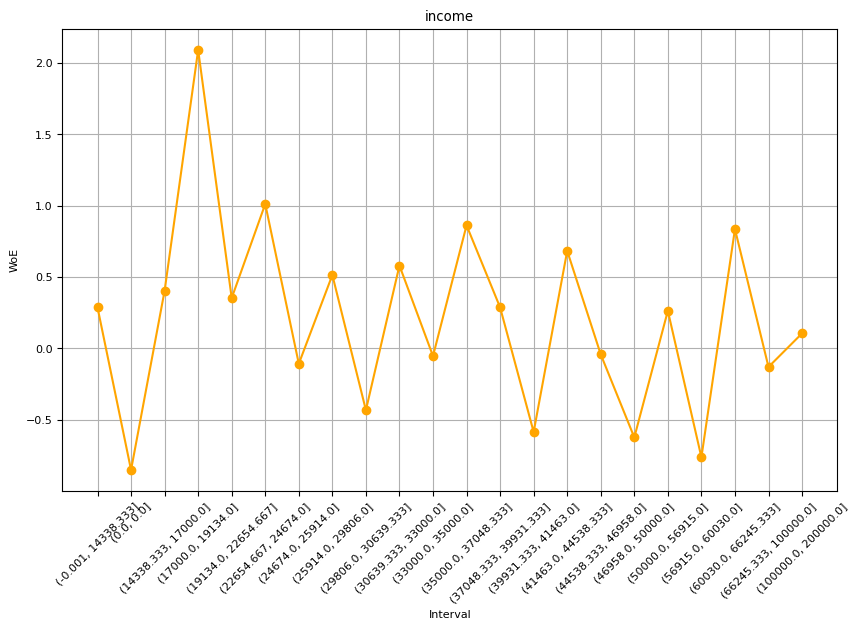

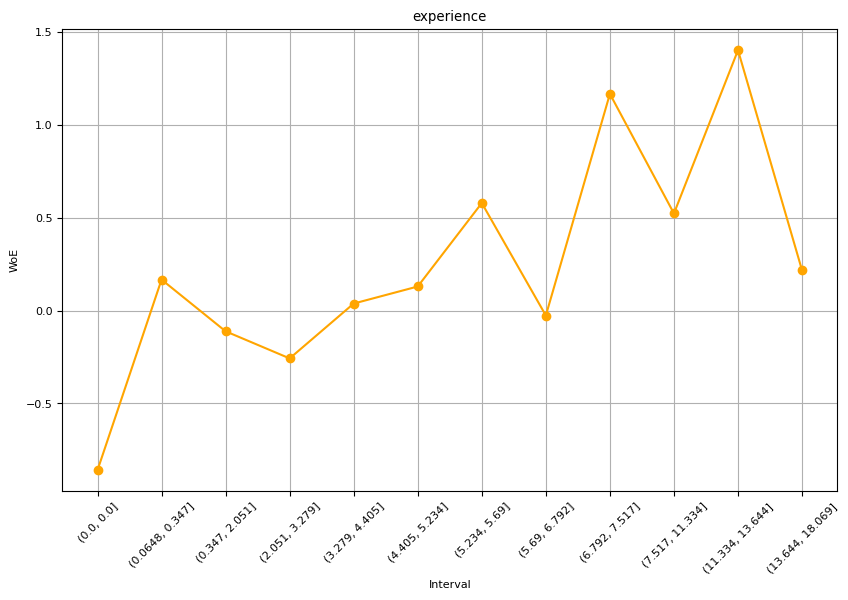

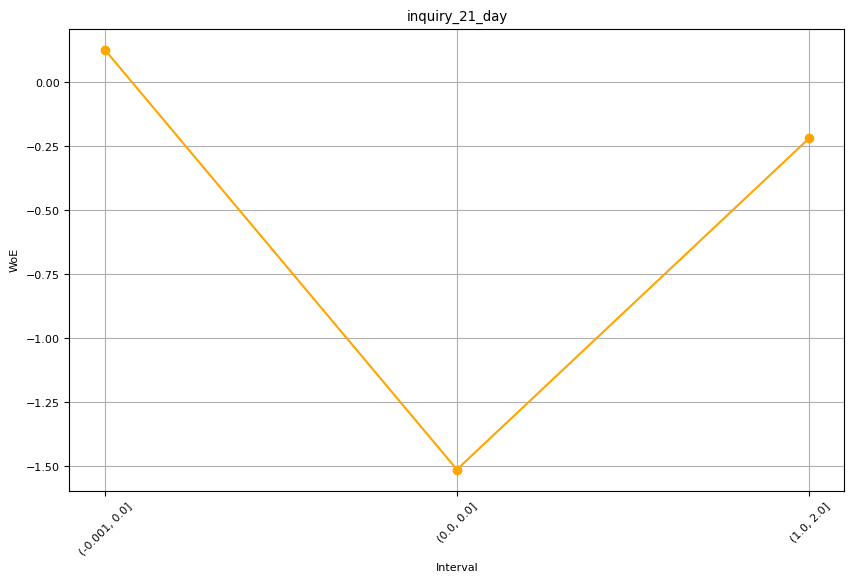

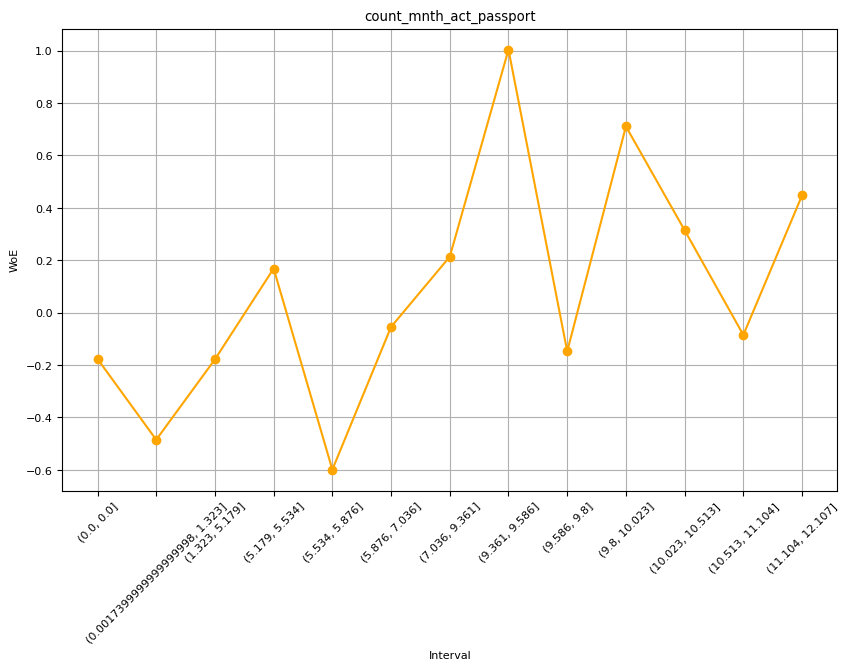

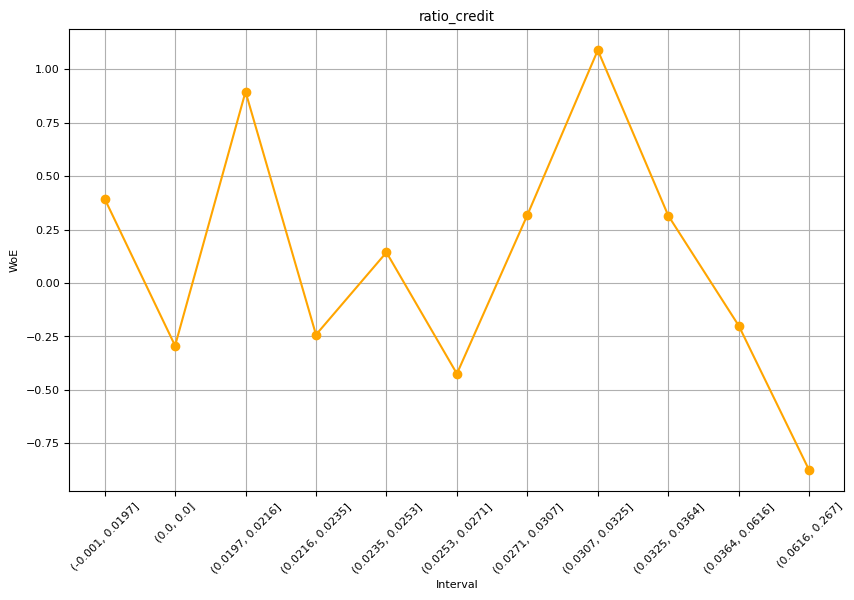

In [1040]:
for col in interval_features:
    a = scorecard[scorecard['feature'] == col].sort_values(by='Value')
    plt.figure(figsize=(10, 6))
    plt.plot(a['Value'].astype(str), a['WoE'], marker='o', color='orange', linestyle='-')
    plt.xlabel('Interval')
    plt.ylabel('WoE')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()    
    

WoE по графику явно не мнонотонен, еще и появились странные интервалы, которых нет в final_intervals.
Вероятно, сбой произошел в функции check_in_intervals, потому что до этого интервалы выводились хоть и в большем, чем 5-10 штук, количестве, но верно (без дубликатов и вложенных значений). 
Единственный объяснимый странный интервал, это (0,0), так как на него мы заменяем пропуски в одной из частей кода уже после того, как остальные интервалы сформированы. При попытке заменить нулевой интервал на интервалы из списка, содержащие 0, появлялись дубликаты с разными скобками закрытия, объединять которые я посчитала некорректным.

Поэтому дальнейшую логистическую регрессию я буду строить на данных из Fine Classing.

# Построение и оценка логистической регресии - максимально 1 балл
- построена только логистическая регрессия - 0.3 балла
- сделана оценка модели ( roc auc, f1, и так далее) - 0.3 балла
- построена скоркарта - 0.4 балла

Напомню, что для скоркарты нужны следующие формулы (детали в лекции и семинаре)

Score_i =  (βi × WoE_i + α/n) × Factor + Offset/n, где

- Factor = pdo/ln(2)

- Offset = Target Score — (Factor × ln(Target Odds))

In [1041]:
features

['WoE_income',
 'WoE_cnt_mnth_from_last_pmnt',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_ratio_credit',
 'WoE_education_',
 'WoE_dependant_number',
 'WoE_is_empl']

In [1042]:
train

,target,uid,WoE_income,WoE_count_active_credit_no_cc,WoE_cnt_mnth_from_last_pmnt,WoE_age,WoE_experience,WoE_inquiry_14_day,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_ratio_experience,WoE_ratio_income,WoE_free_income,WoE_ratio_credit,WoE_income_type,WoE_education_,WoE_customer_category_,WoE_dependant_number,WoE_is_empl
0,0,49365,-0.099464,-0.535447,-0.335627,0.520524,-0.163833,0.063105,0.073359,0.024169,0.197860,-0.063521,-0.095654,-0.382633,-0.070941,0.091406,-0.416153,0.067363,-0.443754
1,0,49364,-0.099464,-0.535447,-0.335627,0.520524,-0.163833,0.063105,0.073359,0.024169,0.197860,-0.063521,-0.095654,-0.382633,-0.070941,0.091406,-0.416153,0.067363,-0.443754
2,0,37495,-0.099464,-0.535447,-0.442589,-0.053965,0.094033,0.063105,0.073359,0.850847,-0.197641,-0.063521,-0.095654,-0.382633,-0.070941,0.091406,-0.416153,0.067363,-0.443754
3,0,37493,-0.099464,-0.535447,-0.442589,-0.053965,0.094033,0.063105,0.073359,0.850847,-0.197641,-0.063521,-0.095654,-0.382633,-0.070941,0.091406,-0.416153,0.067363,-0.443754
4,0,129401,-0.099464,-0.535447,0.036641,0.109844,0.094033,0.063105,0.073359,-0.002897,-0.197641,-0.063521,-0.095654,-0.382633,-0.070941,0.091406,-0.416153,0.067363,-0.443754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22782,0,80804,0.431264,-0.293523,-0.216825,0.008017,-0.108410,0.063105,0.073359,-0.094950,0.260757,-0.069023,-1.554082,-0.293523,-0.070941,0.091406,1.394990,-7.223179,1.867364
22783,1,36855,-1.556438,-0.293523,-0.216825,0.160367,-0.153036,0.063105,0.073359,0.016126,-0.559773,-1.556438,-1.554082,-0.293523,-0.070941,0.091406,1.394990,-7.223179,1.867364
22784,1,125290,-1.556438,-0.535447,0.099992,-0.469382,-0.369926,0.063105,0.073359,-0.307726,-0.392211,-1.556438,-1.554082,-0.382633,-0.070941,-0.202383,1.394990,-7.223179,1.867364
22785,1,10618,-1.556438,-0.535447,-0.429153,0.229134,-0.153036,0.063105,0.073359,0.299762,-0.559773,-1.556438,-1.554082,-0.855237,-0.070941,-0.202383,1.394990,-7.223179,1.867364


In [1043]:
# logistic regression
X_train = train[features] # Задаем признаки
X_test = test[features] 
y_train = train['target'] # Задаем целевую переменную
y_test = test['target']

In [1044]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [1045]:
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
features_coefs

intercept= [-3.73922933]


,features,coef
0,WoE_income,-0.906453
1,WoE_cnt_mnth_from_last_pmnt,-0.839702
2,WoE_experience,-0.875639
3,WoE_inquiry_21_day,-0.898383
4,WoE_count_mnth_act_passport,-0.881073
5,WoE_ratio_credit,-0.793536
6,WoE_education_,-1.594585
7,WoE_dependant_number,-0.737233
8,WoE_is_empl,-1.043871


In [1046]:
y_pred = logreg.predict(X_test)


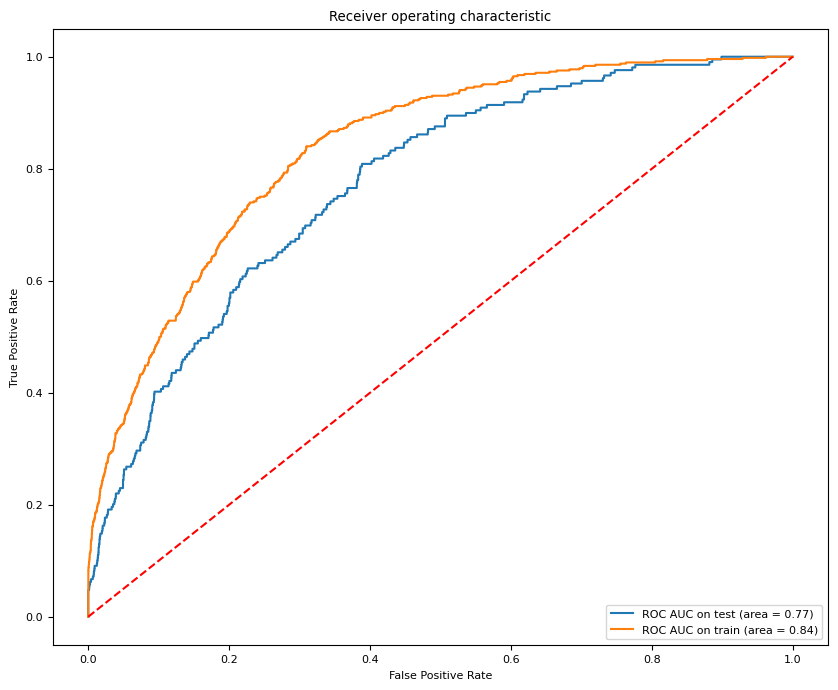

In [1047]:
plt.rc("font", size=8)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='ROC AUC on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='ROC AUC on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC AUC отличается на тренировочном и тестовом наборах данных, это может указывать на некоторые проблемы или особенности модели. Для кредитного скоринга даже небольшое изменение может иметь значение. Различие в 0.07 в рейтинге кредитного скоринга, скорее всего, будет важным для заемщика, поскольку это может повлиять на способность получить кредит, условия кредитования или ставку по кредиту. 

In [1048]:
# Определяем оптимальный трешхолд
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.020381, G-Mean=1.237


In [1049]:
fpr # Выводим False Positive Rates

array([0.        , 0.        , 0.        , ..., 0.9986098 , 0.99869949,
       1.        ])

In [1050]:
cutoff = thresholds[ix]
predictions_01 = np.where(logreg.predict_proba(X_test)[:,1] > cutoff, 1, 0) 
# Переводим вероятности в значения 1-0: если вероятность больше порога, то 1, иначе - 0

In [1051]:
test['predictions_01'] = [el for el in predictions_01]

<Figure size 1000x800 with 0 Axes>

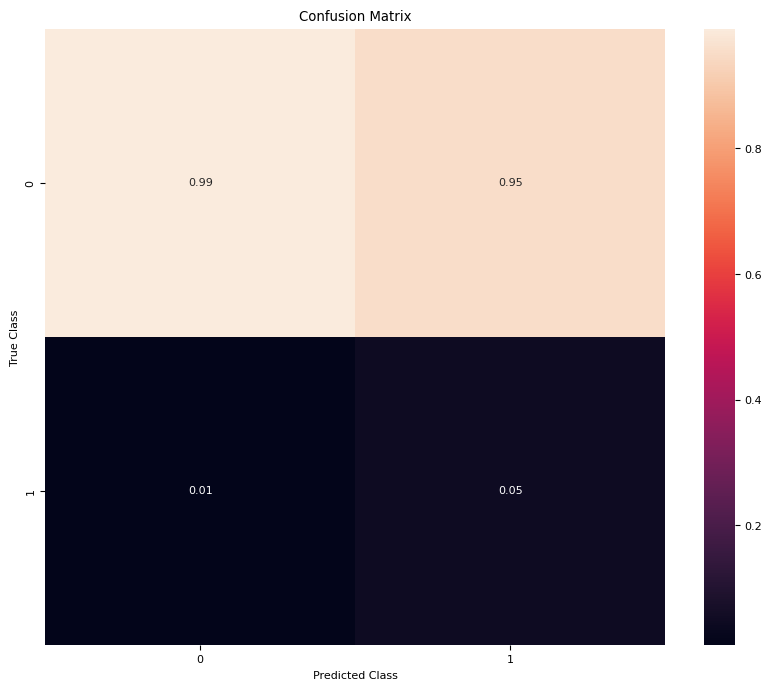

In [1052]:
# Построили Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure()
cm = confusion_matrix(y_test, test['predictions_01'], normalize='pred')
labels = ['0', '1']
plt.figure(figsize=(10,8))
sns.heatmap(cm,
            xticklabels = labels,
            yticklabels = labels,
            annot = True,
            # fmt='d',
            fmt=".2f",
            );
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show();

In [1053]:
cm

array([[0.99020917, 0.95274289],
       [0.00979083, 0.04725711]])

Данная матрица ошибок представлена в виде:

- Верно классифицированных объектов класса 0: 0.99020917
- Неверно классифицированных объектов класса 0 как класс 1: 0.00979083
- Неверно классифицированных объектов класса 1 как класс 0: 0.95274289
- Верно классифицированных объектов класса 1: 0.04725711

Из этой матрицы можно сделать следующие выводы:

- Модель довольно хорошо справляется с предсказанием объектов класса 0.
- Однако модель допускает ошибки при классификации объектов класса 1, так как доля неверно классифицированных объектов намного выше верно классифицированных.
- Можно увидеть, что объекты класса 0 имеют преимущество в предсказаниях перед объектами класса 1.

Таким образом, при анализе этой матрицы ошибок следует обратить внимание на необходимость улучшения классификации объектов класса 1 и балансировки модели.

In [1054]:
# калибровка
scorecard_fine['features'] = 'WoE_'+scorecard_fine['feature'].astype(str)
scorecard_fine = scorecard_fine.merge(features_coefs,how='inner', on='features')
scorecard_fine = scorecard_fine.drop(columns = 'features')
scorecard_fine

,feature,Value,WoE,coef
0,income,"(0, 0]",-1.556438,-0.906453
1,income,"(56915.0, 60030.0]",-0.761711,-0.906453
2,income,"(46958.0, 50000.0]",-0.622834,-0.906453
3,income,"(39931.333, 41463.0]",-0.584705,-0.906453
4,income,"(29806.0, 30639.333]",-0.431958,-0.906453
...,...,...,...,...
151,dependant_number,2.0,-0.730939,-0.737233
152,dependant_number,1.0,-0.501753,-0.737233
153,dependant_number,"(0, 0]",0.067363,-0.737233
154,is_empl,"(0, 0]",-0.443754,-1.043871


In [1055]:
pdo = 20
Target_Odds = 50
Target_Score = 600

Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)

28.85390081777927 487.1228762045055


In [1056]:
scorecard_fine['score'] = (-1)*(scorecard_fine['coef']*scorecard_fine['WoE'] + intercept/13)*Factor + Offset/13
scorecard_fine['score'] = scorecard_fine['score'].round(0)
scorecard_fine['WoE'] = scorecard_fine['WoE'].round(2)
scorecard_fine['coef'] = scorecard_fine['coef'].round(2)
scorecard_fine

,feature,Value,WoE,coef,score
0,income,"(0, 0]",-1.56,-0.91,5.0
1,income,"(56915.0, 60030.0]",-0.76,-0.91,26.0
2,income,"(46958.0, 50000.0]",-0.62,-0.91,29.0
3,income,"(39931.333, 41463.0]",-0.58,-0.91,30.0
4,income,"(29806.0, 30639.333]",-0.43,-0.91,34.0
...,...,...,...,...,...
151,dependant_number,2.0,-0.73,-0.74,30.0
152,dependant_number,1.0,-0.50,-0.74,35.0
153,dependant_number,"(0, 0]",0.07,-0.74,47.0
154,is_empl,"(0, 0]",-0.44,-1.04,32.0


In [1057]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['1', '0'])
print(report)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      9558
           0       1.00      0.05      0.09       209

    accuracy                           0.98      9767
   macro avg       0.99      0.52      0.54      9767
weighted avg       0.98      0.98      0.97      9767



Интерпретация метрик:

- Precision (точность) для класса 1 (1): 0.98. Это означает, что 98% объектов, отнесенных к классу 1, действительно принадлежат к этому классу.
- Recall (полнота) для класса 1 (1): 1.00. Это означает, что модель правильно классифицировала все объекты класса 1 из общего числа объектов класса 1.
- F1-score для класса 1 (1): 0.99. F1-score является средним гармоническим между точностью и полнотой и характеризует сбалансированность между ними.
- Support для класса 1 (1): 9558. Это количество объектов класса 1 в тестовом наборе данных.

- Precision для класса 0 (0): 1.00. Это означает, что все объекты, отнесенные к классу 0, действительно принадлежат к этому классу.
- Recall для класса 0 (0): 0.05. Это означает, что модель правильно классифицировала только 5% объектов класса 0 из общего числа объектов класса 0.
- F1-score для класса 0 (0): 0.09.
- Support для класса 0 (0): 209. Это количество объектов класса 0 в тестовом наборе данных.

Таким образом, модель показывает высокую точность и полноту для класса 1, а для класса 0 наблюдается низкая полнота. Для балансировки модели и улучшения ее предсказательной способности, возможно, потребуется больше данных или изменения в процессе обучения.

Обнаружили противоречия между выводами из матрицы ошибок и метриками модели.

Так как в исходных данных класс 0 преобладает с overwhelming dominance в 98%, а класс 1 представлен всего в 2% случаев, модель может быть сильно смещена в сторону предсказания объектов класса 0 без учета класса 1, что может привести к высокому проценту верно классифицированных нулей (True Negatives), но низким значениям recall для класса 0.

Низкий recall для класса 0 означает, что некоторые объекты класса 0 были неверно предсказаны как класс 1 (False Negatives), из-за чего модель не способна хорошо выявлять объекты класса 0.

В таком случае, необходимо принимать во внимание дисбаланс классов при оценке модели и предпринимать соответствующие меры. Возможно, потребуется использовать специальные техники для работы с дисбалансом классов, такие как взвешивание классов, аугментация данных меньшего класса, или использование методов ресемплинга данных. Также стоит обратить внимание на оптимизацию гиперпараметров модели и выбор более подходящего алгоритма классификации.

# Reject Inference (Анализ отклоненных заявок). Максимально -  3 балла
- проведен анализ отклоненых заявок и сравнение с одобренными заявками - 0.2 балла
- проведена разметка отклоненных заявок одним методом (метод можно взять либо из семинара/лекции или любой другой логичный метод, просто всем ставить 1 - нельзя) - 1 балл
- построена общая логистическая регрессия с WoE переменными на одобренных и отказанных заявках - 1 балл
- построена скоркарта - 0.3 балла
- сделан вывод и даны рекомендации какую модель внедрять в продакшен среду 0.3 балла
- даны рекомендации как реализовать мониторинг модели после внедрения в продакшен 0.2 балла

In [1058]:
reject

,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
0,2NDFL,elementary,NaN,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,1.0,1.0,4.268261,12
1,2NDFL,elementary,NaN,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,0.0,0.0,1.411206,27
2,2NDFL,advanced,NaN,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,0.0,1.0,4.544405,33
3,2NDFL,advanced,NaN,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,0.0,0.0,3.183060,41
4,2NDFL,elementary,NaN,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,NaN,NaN,3.581967,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,2NDFL,advanced,NaN,24311.0,0.0,0,NaN,NaN,23.456284,1.188060,NaN,NaN,3.401639,140863
10689,OTHER,elementary,NaN,21400.0,0.0,0,0.0,1.271550,24.040984,0.994303,0.0,0.0,2.739509,140864
10690,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623,0.568531,1.0,1.0,4.377049,140869
10691,OTHER,elementary,NaN,21750.0,0.0,0,NaN,NaN,23.218579,0.742039,NaN,NaN,3.002313,140885


In [1059]:
reject.columns

Index(['income_type', 'education_', 'customer_category_', 'income',
       'dependant_number', 'is_empl', 'count_active_credit_no_cc',
       'cnt_mnth_from_last_pmnt', 'age', 'experience', 'inquiry_14_day',
       'inquiry_21_day', 'count_mnth_act_passport', 'uid'],
      dtype='object')

In [1060]:
# Смотрим на уникальные значения, чтобы выявить проблемные места 
reject_unique_values = {}

for column in reject.columns:
    reject_unique_values[column] = reject[column].unique()

reject_unique_values

{'income_type': array(['2NDFL', 'OTHER'], dtype=object),
 'education_': array(['elementary', 'advanced', 'high', 'beginner'], dtype=object),
 'customer_category_': array([nan, 'Corporate', 'VIP'], dtype=object),
 'income': array([26106., 30276., 23147., ..., 21400., 22532., 12432.]),
 'dependant_number': array([ 0.,  1., nan,  2.]),
 'is_empl': array([0, 1], dtype=int64),
 'count_active_credit_no_cc': array([ 0.,  1., nan,  2.,  3.,  5.,  4.,  6.]),
 'cnt_mnth_from_last_pmnt': array([1.66680108, 0.66046147, 4.34202509, ..., 2.08351254, 1.27155018,
        0.60129928]),
 'age': array([24.3531926 , 23.5344936 , 24.58002096, ..., 24.87818699,
        23.05442024, 24.83429897]),
 'experience': array([3.28415301, 3.58106894, 0.64577438, ..., 1.18806048, 0.99430347,
        0.56853058]),
 'inquiry_14_day': array([ 1.,  0., nan,  2.,  4.,  6.,  3.,  5.]),
 'inquiry_21_day': array([ 1.,  0., nan,  2.,  4.,  3.,  6.,  5.,  8.]),
 'count_mnth_act_passport': array([4.2682611 , 1.41120593, 4.54440

In [1061]:
reject.dtypes

income_type                   object
education_                    object
customer_category_            object
income                       float64
dependant_number             float64
is_empl                        int64
count_active_credit_no_cc    float64
cnt_mnth_from_last_pmnt      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
uid                            int64
dtype: object

In [1062]:
reject[['is_empl', 'dependant_number']] = reject[['is_empl', 'dependant_number']].astype(object)
# Меняем тип данных у категориальных переменных, которые воспринимаются как количественные

In [1063]:
reject_nan = reject.isnull().sum().to_frame() # Пропущенные значения
percent_reject_nan = ((reject_nan.T/len(reject)).T)*100
percent_reject_nan = percent_reject_nan.rename(columns = {0:'Percent_reject_NaN'})

In [1064]:
nan_2 = reject_nan.join(percent_reject_nan).rename(columns = {0:'Reject_NaN'})

In [1065]:
reject_null = reject[reject==0].count().to_frame() # Нулевые значения
percent_reject_null = ((reject_null.T/len(reject)).T)*100
percent_reject_null = percent_reject_null.rename(columns = {0:'Percent_reject_null'})

In [1066]:
null_2 = reject_null.join(percent_reject_null).rename(columns = {0:'Reject_Null'})

In [1067]:
nan_1.join(null_1).join(nan_2).join(null_2)

,Accept_NaN,Percent_accept_NaN,Accept_Null,Percent_accept_null,Reject_NaN,Percent_reject_NaN,Reject_Null,Percent_reject_null
target,0,0.000000,31857,97.858942,NaN,NaN,NaN,NaN
income_type,0,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000
education_,0,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000
customer_category_,19459,59.774528,0,0.000000,5042.0,47.152343,0.0,0.000000
income,653,2.005898,4,0.012287,546.0,5.106144,4.0,0.037408
dependant_number,40,0.122873,32355,99.388708,5.0,0.046760,10671.0,99.794258
is_empl,0,0.000000,19853,60.984825,0.0,0.000000,4884.0,45.674740
count_active_credit_no_cc,8364,25.692695,12273,37.700436,4408.0,41.223230,3552.0,33.217993
cnt_mnth_from_last_pmnt,10145,31.163605,13,0.039934,5467.0,51.126905,3.0,0.028056
age,0,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000


Посчитали нулевые и пропущенные значения для отклоненных заявок:

* Среди категориальных переменных больше всего пропусков обнаружено у customer_category_ (60%). Чтобы не удалять больше половины выборки, в дальнейшем заменим пропущенные значения на Unknown category;

* Также около 30% пропусков видим у количественных переменных count_active_credit_no_cc и cnt_mnth_from_last_pmnt;

* По большей части количества нулевых значений для переменных не вызывают вопросов: в категориальных 0 обозначает одну из категорий, в переменных, отвечающих за количество кредитов, 0 - отсутствие кредитов, в переменных запросов 0 - это отсутствие запросов.
* В переменных count_active_credit_no_cc, income, cnt_mnth_from_last_pmnt в одобренных заявках меньше пропусков, чем в отклоненных, у experience, customer_category_ - больше.

In [1068]:
reject.describe(include = 'all')

,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid
count,10693,10693,5651,10147.000000,10688.0,10693.0,6285.000000,5226.000000,10693.000000,10685.000000,6089.000000,6089.000000,10693.000000,10693.000000
unique,2,4,2,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,OTHER,elementary,Corporate,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6684,6778,5640,NaN,10671.0,5809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33651.242633,NaN,NaN,0.540971,42.478167,24.037108,1.660079,0.340614,0.414025,3.509274,72713.527728
std,NaN,NaN,NaN,21821.837966,NaN,NaN,0.730867,228.831924,0.738261,1.394135,0.619647,0.708179,1.154384,41248.658196
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,-31.072849,0.002732,0.024590,0.000000,0.000000,0.002740,12.000000
25%,NaN,NaN,NaN,20787.500000,NaN,NaN,0.000000,0.506989,23.547945,0.602425,0.000000,0.000000,3.063852,36800.000000
50%,NaN,NaN,NaN,29115.000000,NaN,NaN,0.000000,0.864539,24.109290,1.225735,0.000000,0.000000,3.713115,74767.000000
75%,NaN,NaN,NaN,40318.000000,NaN,NaN,1.000000,1.849322,24.581967,2.249315,1.000000,1.000000,4.292350,108555.000000


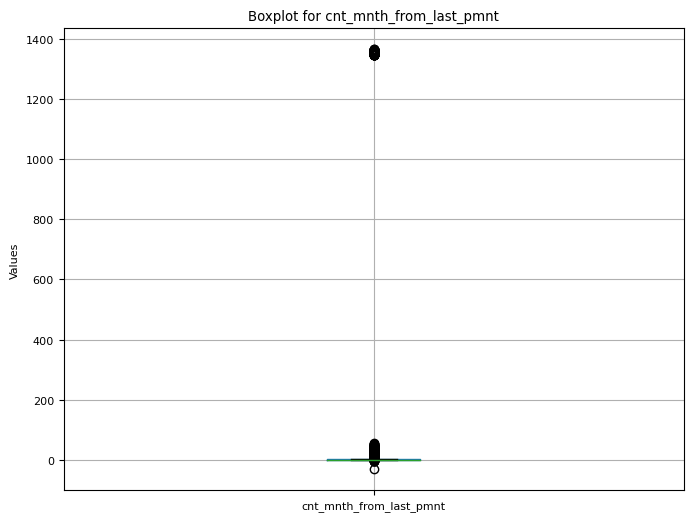

In [1069]:
reject['cnt_mnth_from_last_pmnt'].max()
plt.figure(figsize=(8, 6)) 
# По ящику с усами видим сильные выбросы
# Подавляющее большинство значений: 1
# Выбросы со значениями выше 60 сильно выбиваются на общем фоне
reject.boxplot(column='cnt_mnth_from_last_pmnt')
plt.title('Boxplot for cnt_mnth_from_last_pmnt')
plt.ylabel('Values')
plt.show();

In [1070]:
# заменим отрицательные значения на пропуск
reject['cnt_mnth_from_last_pmnt']=reject['cnt_mnth_from_last_pmnt'].map(lambda x: x if x>0 and x<60 else np.NaN)
# По графику видим, что большинство значений это 1
# Есть отрицательный выброс, заменяем его на пропуск, так как количество месяцев не может быть отрицательным
# Также наблюдаем экстремальные значения за тысячу и до 60
# Заменяем на пропуск тысячные значения, так как они не соотносятся с реальностью

In [1071]:
reject.dtypes

income_type                   object
education_                    object
customer_category_            object
income                       float64
dependant_number              object
is_empl                       object
count_active_credit_no_cc    float64
cnt_mnth_from_last_pmnt      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
uid                            int64
dtype: object

Новые переменные аналогичны тем, что мы создали для принятых заявок.

In [1072]:
reject['customer_category_'].replace(np.NaN, 'Unknown category', inplace = True)
groups_2 = reject['income'].groupby(reject['customer_category_']).mean()
groups_2

customer_category_
Corporate            34341.889284
Unknown category     32460.837436
VIP                 168312.000000
Name: income, dtype: float64

In [1073]:
def f_2(data):
    if data['customer_category_'] == 'Corporate':
        val = data['income']/groups_2[0]
    elif data['customer_category_'] == 'Unknown category':
        val = data['income']/groups_2[1]
    else :
        val = data['income']/groups_2[2]
    return val

reject['ratio_income'] = reject.apply (f_2, axis=1)

In [1074]:
reject['ratio_experience'] = reject['experience']/accept['age']
reject['free_income'] = (reject['income']/(reject['dependant_number'] + 1)).astype(float)
# Отношение открытых кредитов к доходу
reject['ratio_credit'] = reject['count_active_credit_no_cc']/(reject['age'])
reject.describe(include = 'all')

,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_income,ratio_experience,free_income,ratio_credit
count,10693,10693,10693,10147.000000,10688.0,10693.0,6285.000000,4925.000000,10693.000000,10685.000000,6089.000000,6089.000000,10693.000000,10693.000000,10147.000000,10685.000000,10147.000000,6285.000000
unique,2,4,3,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,OTHER,elementary,Corporate,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6684,6778,5640,NaN,10671.0,5809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33651.242633,NaN,NaN,0.540971,2.722077,24.037108,1.660079,0.340614,0.414025,3.509274,72713.527728,1.000000,0.047839,33630.845554,0.022378
std,NaN,NaN,NaN,21821.837966,NaN,NaN,0.730867,5.478277,0.738261,1.394135,0.619647,0.708179,1.154384,41248.658196,0.620201,0.042260,21832.664831,0.030178
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.048835,0.002732,0.024590,0.000000,0.000000,0.002740,12.000000,0.000000,0.000805,0.000000,0.000000
25%,NaN,NaN,NaN,20787.500000,NaN,NaN,0.000000,0.533378,23.547945,0.602425,0.000000,0.000000,3.063852,36800.000000,0.620754,0.017265,20756.500000,0.000000
50%,NaN,NaN,NaN,29115.000000,NaN,NaN,0.000000,0.863911,24.109290,1.225735,0.000000,0.000000,3.713115,74767.000000,0.867337,0.034320,29092.000000,0.000000
75%,NaN,NaN,NaN,40318.000000,NaN,NaN,1.000000,1.636783,24.581967,2.249315,1.000000,1.000000,4.292350,108555.000000,1.207578,0.064083,40316.000000,0.041290


In [1075]:
accept.describe(include = 'all')

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income,free_income,ratio_credit,income_bin,count_active_credit_no_cc_bin,cnt_mnth_from_last_pmnt_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,ratio_experience_bin,ratio_income_bin,free_income_bin,ratio_credit_bin,income_interval,cnt_mnth_from_last_pmnt_interval,inquiry_21_day_interval,count_mnth_act_passport_interval,experience_interval,ratio_credit_interval
count,32554.000000,32554,32554,32554,3.190100e+04,32554.0,32554.000000,24190.000000,21403.000000,32554.000000,32504.000000,32554.000000,32554.000000,32547.000000,32554.000000,32504.000000,31901.000000,3.190000e+04,24190.000000,32554,32554,32554.0,32554,32554,32554,32554,32554,32554,32554,32554,32554,32554,32554,32554,32554,32554,32554
unique,NaN,2,4,3,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,4,31.0,30,31,2,3,31,31,31,31,16,22,17,3,13,12,11
top,NaN,OTHER,elementary,Unknown category,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(46958.0, 50000.0]","(-0.001, 1.0]",0.0,"(31.067, 31.743]","(1.562, 1.805]","(-0.001, 1.0]","(-0.001, 1.0]","(6.665, 7.036]","(0.0003699999999999999, 0.00989]","(0.952, 1.03]","(46802.0, 50000.0]","(-0.001, 0.0197]","[66245.333, 100000.0]","(0, 0]","[-0.001, 0]","[7.036, 9.361]","[0.347, 2.051]","[-0.001, 0.0197]"
freq,NaN,21863,21330,19459,NaN,32355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1550,21215,11151.0,1089,1088,31495,31090,1089,1084,1329,1586,12901,4415,11151,24555,7591,10836,12917
mean,0.021411,NaN,NaN,NaN,6.133177e+04,NaN,0.390152,0.661926,5.026913,36.432497,4.888695,0.259661,0.305339,7.251761,70630.132795,0.128936,1.000000,6.116078e+04,0.018930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.144751,NaN,NaN,NaN,1.069330e+05,NaN,0.487792,0.835298,10.165064,8.219484,5.214919,0.542940,0.611307,3.340323,40512.136053,0.119264,1.545642,1.068613e+05,0.024652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,0.044288,25.000187,0.065753,0.000000,0.000000,0.002740,10.000000,0.001370,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,2.677800e+04,NaN,0.000000,0.000000,0.538530,29.507145,1.241491,0.000000,0.000000,4.998570,35821.750000,0.036351,0.454578,2.666150e+04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,4.146300e+04,NaN,0.000000,0.000000,0.928651,34.734015,3.279452,0.000000,0.000000,7.781421,70762.000000,0.094492,0.699912,4.134300e+04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,NaN,NaN,NaN,7.000000e+04,NaN,1.000000,1.000000,3.261122,42.200724,6.479452,0.000000,0.000000,9.912827,105834.250000,0.183493,1.171142,6.999925e+04,0.031617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1076]:
reject['dependant_number'].value_counts()

dependant_number
0.0    10671
1.0       15
2.0        2
Name: count, dtype: int64

Видим, что количество наблюдений в отклоненных заявках в 3 раза меньше, чем в принятых.
В отклоненных заявках представлено всего 3 из 6 категорий dependant_number.

* Средний возраст в отклоненных заявках (24 года) сильно меньше среднего возраста в принятых (36 лет). 
* Средний стаж работы в отклоненных заявках меньше, чем в принятых (1.7 против 4.9).
* Cреднее ratio_credit (соотношение числа кредитов и возраста) больше в отклоненных заявках.

Видим понятные и хорошо объяснимые результаты статистик: банки больше склонны отказывать молодым клиентам с малым опытом работы и более высокой долговой нагрузкой, чтобы минимизировать свои риски.





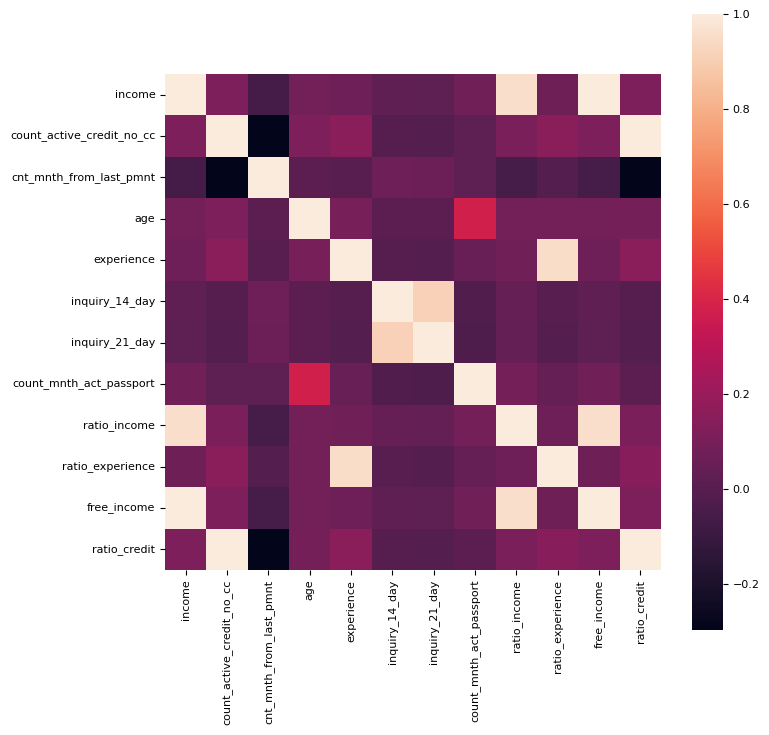

In [1077]:
# матрица корреляций
plt.figure(figsize=(8, 8))
sns.heatmap(reject.select_dtypes(include=['float64']).corr(), square=True)
plt.show()

Наиболее сильная корреляция у дохода и свободного дохода, ratio_credit и count_active_last_pmnt, ratio_experience и experience, что объяснимо, так как они линейно зависят друг от друга, а корреляция как раз и показывает меру линейной связи признаков.

Так же, как и в принятых заявках, наблюдается сильная корреляция переменных, отвечающих за запросы, но возраст и стаж уже не так сильно взаимосвязаны.



# Разметка

In [1078]:
# вещественные переменные
interval_features = reject.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('uid')
interval_features

['income',
 'count_active_credit_no_cc',
 'cnt_mnth_from_last_pmnt',
 'age',
 'experience',
 'inquiry_14_day',
 'inquiry_21_day',
 'count_mnth_act_passport',
 'ratio_income',
 'ratio_experience',
 'free_income',
 'ratio_credit']

In [1079]:
# категориальные переменные
categorical_features = reject.select_dtypes(include=['object']).columns.tolist()
categorical_features

['income_type',
 'education_',
 'customer_category_',
 'dependant_number',
 'is_empl']

In [1080]:
# делим интервальные переменные на бины
for feature in interval_features:
    reject[feature + '_bin'] = pd.qcut(reject[feature], 30, duplicates='drop')
    reject[feature + '_bin'] = reject[feature + '_bin'].cat.add_categories(0).fillna(0)

for feature in categorical_features:
    reject[feature] = reject[feature].fillna("UNK")

In [1081]:
accept = accept.drop(['income_interval', 'cnt_mnth_from_last_pmnt_interval', 'inquiry_21_day_interval',
                      'count_mnth_act_passport_interval', 'experience_interval', 'ratio_credit_interval'], axis = 1)
accept

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income,free_income,ratio_credit,income_bin,count_active_credit_no_cc_bin,cnt_mnth_from_last_pmnt_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,ratio_experience_bin,ratio_income_bin,free_income_bin,ratio_credit_bin
0,0,2NDFL,elementary,Unknown category,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,0.0,0.0,5.536986,10,0.042152,0.965951,56245.0,NaN,"(52230.667, 56915.0]",0,0,"(49.14, 50.862]","(2.051, 2.323]","(-0.001, 1.0]","(-0.001, 1.0]","(5.534, 5.876]","(0.0395, 0.0458]","(0.952, 1.03]","(52200.0, 56780.0]",0
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11,0.072109,2.040607,119510.0,0.035471,"(118311.0, 145653.0]","(-0.001, 1.0]","(1.054, 1.122]","(27.997, 28.625]","(1.805, 2.051]","(-0.001, 1.0]","(-0.001, 1.0]","(7.781, 8.184]","(0.0682, 0.0765]","(1.897, 2.357]","(118027.5, 145255.0]","(0.0344, 0.0364]"
2,0,2NDFL,advanced,Unknown category,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13,0.486625,0.206431,12020.0,0.027444,"(-0.001, 14338.333]","(-0.001, 1.0]","(0.272, 0.312]","(35.609, 36.475]","(13.644, 18.069]","(-0.001, 1.0]","(-0.001, 1.0]","(9.109, 9.361]","(0.421, 0.732]","(-0.001, 0.243]","(-0.001, 14168.3]","(0.0271, 0.0289]"
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,0.0,0.0,7.972678,15,0.051346,0.369003,21611.0,NaN,"(20805.333, 22654.667]",0,0,"(33.239, 33.984]","(1.562, 1.805]","(-0.001, 1.0]","(-0.001, 1.0]","(7.781, 8.184]","(0.0458, 0.0526]","(0.353, 0.384]","(20658.2, 22534.0]",0
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17,0.015813,0.478516,146841.0,0.000000,"(145653.0, 200000.0]","(-0.001, 1.0]","(22.803, 36.443]","(36.475, 37.4]","(0.533, 0.62]","(-0.001, 1.0]","(-0.001, 1.0]","(7.411, 7.781]","(0.013, 0.0159]","(0.47, 0.506]","(145255.0, 200000.0]","(-0.001, 0.0197]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,Unknown category,90000.0,0.0,0,0.0,10.693705,40.642922,4.847840,0.0,0.0,11.528767,138843,0.119279,1.545659,90000.0,0.000000,"(89413.333, 100000.0]","(-0.001, 1.0]","(7.96, 11.646]","(40.476, 41.606]","(4.819, 5.234]","(-0.001, 1.0]","(-0.001, 1.0]","(11.499, 12.107]","(0.115, 0.125]","(1.471, 1.686]","(88803.0, 100000.0]","(-0.001, 0.0197]"
32550,1,OTHER,advanced,Unknown category,60000.0,0.0,0,1.0,0.891062,28.163934,3.329927,1.0,1.0,7.242256,139153,0.118234,1.030439,60000.0,0.035506,"(56915.0, 60030.0]","(-0.001, 1.0]","(0.887, 0.929]","(27.997, 28.625]","(3.279, 3.655]","(-0.001, 1.0]","(-0.001, 1.0]","(7.036, 7.411]","(0.115, 0.125]","(0.952, 1.03]","(56780.0, 60000.0]","(0.0344, 0.0364]"
32551,1,OTHER,advanced,Unknown category,45000.0,0.0,0,0.0,0.301770,30.703810,1.418879,1.0,1.0,9.325728,139154,0.046212,0.772830,45000.0,0.000000,"(44538.333, 46958.0]","(-0.001, 1.0]","(0.272, 0.312]","(30.413, 31.067]","(1.343, 1.562]","(-0.001, 1.0]","(-0.001, 1.0]","(9.109, 9.361]","(0.0458, 0.0526]","(0.75, 0.79]","(44350.2, 46802.0]","(-0.001, 0.0197]"
32552,1,OTHER,advanced,Corporate,40000.0,0.0,0,NaN,NaN,29.716581,5.363156,0.0,0.0,6.935759,140165,0.180477,0.682991,40000.0,NaN,"(39931.333, 41463.0]",0,0,"(29.204, 29.803]","(5.234, 5.69]","(-0.001, 1.0]","(-0.001, 1.0]","(6.665, 7.036]","(0.176, 0.192]","(0.674, 0.7]","(39774.4, 41343.0]",0


In [1082]:
reject

,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_income,ratio_experience,free_income,ratio_credit,income_bin,count_active_credit_no_cc_bin,cnt_mnth_from_last_pmnt_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,ratio_income_bin,ratio_experience_bin,free_income_bin,ratio_credit_bin
0,2NDFL,elementary,Unknown category,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,1.0,1.0,4.268261,12,0.804231,0.064946,26106.0,0.000000,"(25452.8, 26461.6]","(-0.001, 1.0]","(1.468, 1.858]","(24.306, 24.366]","(3.236, 3.691]","(-0.001, 1.0]","(-0.001, 1.0]","(4.255, 4.331]","(0.793, 0.827]","(0.0615, 0.0669]","(25427.0, 26438.0]","(-0.001, 0.04]"
1,2NDFL,elementary,Unknown category,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,0.0,0.0,1.411206,27,0.932693,0.127025,30276.0,0.042491,"(30114.2, 31573.0]","(-0.001, 1.0]","(0.635, 0.689]","(23.507, 23.584]","(3.236, 3.691]","(-0.001, 1.0]","(-0.001, 1.0]","(1.26, 1.97]","(0.909, 0.938]","(0.123, 0.151]","(30110.8, 31569.8]","(0.0421, 0.0426]"
2,2NDFL,advanced,Unknown category,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,0.0,1.0,4.544405,33,0.713075,0.017723,23147.0,0.000000,"(22447.0, 23599.0]","(-0.001, 1.0]","(3.6, 5.149]","(24.55, 24.61]","(0.632, 0.697]","(-0.001, 1.0]","(-0.001, 1.0]","(4.495, 4.575]","(0.703, 0.736]","(0.0165, 0.0181]","(22415.0, 23558.0]","(-0.001, 0.04]"
3,2NDFL,advanced,Unknown category,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,0.0,0.0,3.183060,41,1.020183,0.027034,33116.0,0.000000,"(33058.8, 34790.2]","(-0.001, 1.0]","(0.724, 0.764]","(23.258, 23.343]","(0.857, 0.943]","(-0.001, 1.0]","(-0.001, 1.0]","(3.107, 3.192]","(0.983, 1.029]","(0.0266, 0.0289]","(33054.0, 34764.8]","(-0.001, 0.04]"
4,2NDFL,elementary,Unknown category,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,NaN,NaN,3.581967,55,1.416230,0.038467,45972.0,NaN,"(44000.0, 46709.0]",0,0,"(24.493, 24.55]","(1.329, 1.437]",0,0,"(3.536, 3.631]","(1.387, 1.509]","(0.0371, 0.0405]","(43998.2, 46709.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,2NDFL,advanced,Unknown category,24311.0,0.0,0,NaN,NaN,23.456284,1.188060,NaN,NaN,3.401639,140863,0.748933,0.028569,24311.0,NaN,"(23599.0, 24650.0]",0,0,"(23.425, 23.507]","(1.124, 1.226]",0,0,"(3.371, 3.458]","(0.736, 0.766]","(0.0266, 0.0289]","(23558.0, 24614.0]",0
10689,OTHER,elementary,Unknown category,21400.0,0.0,0,0.0,1.271550,24.040984,0.994303,0.0,0.0,2.739509,140864,0.659256,0.037181,21400.0,0.000000,"(20223.8, 21415.0]","(-0.001, 1.0]","(1.183, 1.278]","(24.038, 24.109]","(0.943, 1.032]","(-0.001, 1.0]","(-0.001, 1.0]","(2.48, 2.781]","(0.639, 0.67]","(0.0371, 0.0405]","(21372.6, 22415.0]","(-0.001, 0.04]"
10690,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623,0.568531,1.0,1.0,4.377049,140869,0.656108,0.016407,22532.0,0.040912,"(22447.0, 23599.0]","(-0.001, 1.0]","(0.598, 0.635]","(24.426, 24.493]","(0.568, 0.632]","(-0.001, 1.0]","(-0.001, 1.0]","(4.331, 4.416]","(0.639, 0.67]","(0.015, 0.0165]","(22415.0, 23558.0]","(0.0407, 0.0409]"
10691,OTHER,elementary,Unknown category,21750.0,0.0,0,NaN,NaN,23.218579,0.742039,NaN,NaN,3.002313,140885,0.670038,0.026997,21750.0,NaN,"(21415.0, 22447.0]",0,0,"(23.176, 23.258]","(0.697, 0.776]",0,0,"(2.936, 3.021]","(0.639, 0.67]","(0.0266, 0.0289]","(21372.6, 22415.0]",0


In [1083]:
s = scorecard_fine[scorecard_fine['feature'] == 'is_empl'].replace(pd.Interval(0,0), 0)

In [1084]:
s[(s['feature'] == 'is_empl') & (s['Value'] == 0)]['WoE']

154   -0.44
Name: WoE, dtype: float64

In [1085]:
reject['WoE_is_empl'] = np.where(reject['is_empl'] == 0, -0.44, 1.87)

In [1086]:
scorecard_fine[scorecard_fine['feature'] == 'dependant_number'].replace(pd.Interval(0,0), 0)

,feature,Value,WoE,coef,score
148,dependant_number,UNK,-7.22,-0.74,-108.0
149,dependant_number,4.0,-0.80,-0.74,29.0
150,dependant_number,3.0,-0.80,-0.74,29.0
151,dependant_number,2.0,-0.73,-0.74,30.0
152,dependant_number,1.0,-0.50,-0.74,35.0
153,dependant_number,0,0.07,-0.74,47.0


In [1087]:
conditions = [
    (reject['dependant_number'] == 'UNK'),
    (reject['dependant_number'] == 4),
    (reject['dependant_number'] == 3),
    (reject['dependant_number'] == 2),
    (reject['dependant_number'] == 1),
    (reject['dependant_number'] == 0)
]
values = [-7.22, -0.80, -0.80, -0.73, -0.50, 0.07]
reject['WoE_dependant_number'] = np.select(conditions, values, default=np.NaN)


In [1088]:
scorecard_fine[scorecard_fine['feature'] == 'education_']

,feature,Value,WoE,coef,score
144,education_,advanced,-0.20,-1.59,36.0
145,education_,high,-0.18,-1.59,37.0
146,education_,elementary,0.09,-1.59,50.0
147,education_,beginner,0.20,-1.59,55.0


In [1089]:
conditions = [
    (reject['education_'] == 'advanced'),
    (reject['education_'] == 'high'),
    (reject['education_'] == 'elementary'),
    (reject['education_'] == 'beginner')]
values = [-0.20, -0.18, 0.09, 0.20]
reject['WoE_education_'] = np.select(conditions, values, default=np.NaN)

In [1090]:
scorecard_fine['feature'].value_counts()

feature
income                     31
cnt_mnth_from_last_pmnt    31
experience                 31
count_mnth_act_passport    31
ratio_credit               16
dependant_number            6
inquiry_21_day              4
education_                  4
is_empl                     2
Name: count, dtype: int64

In [1091]:
def check_in_intervals(number, intervals):
    for interval in intervals:
        if interval.left <= number <= interval.right:
            return interval
    return np.NaN


In [1092]:
scorecard_fine[scorecard_fine['Value'] == check_in_intervals(reject['income'].iloc[10688], scorecard_fine[scorecard_fine['feature'] == 'income']['Value'])]['WoE']

29    1.01
Name: WoE, dtype: float64

In [1093]:
# Для значений переменных reject находим соответствующие значения WoE из accept

cols = ['income', 'cnt_mnth_from_last_pmnt', 'experience', 'count_mnth_act_passport', 'ratio_credit', 'inquiry_21_day']
i = 0
while i <= len(reject) - 1:
    for column in cols:
        a = scorecard_fine.loc[scorecard_fine['Value'] == check_in_intervals(reject[column].iloc[i], scorecard_fine.loc[scorecard_fine['feature'] == column, 'Value']), 'WoE']
        if not a.empty:
            reject.loc[i, 'WoE_' + column] = a.iloc[0]
        else:
            reject.loc[i, 'WoE_' + column] = 0
    i += 1
reject

,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_income,ratio_experience,free_income,ratio_credit,income_bin,count_active_credit_no_cc_bin,cnt_mnth_from_last_pmnt_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,ratio_income_bin,ratio_experience_bin,free_income_bin,ratio_credit_bin,WoE_is_empl,WoE_dependant_number,WoE_education_,WoE_income,WoE_cnt_mnth_from_last_pmnt,WoE_experience,WoE_count_mnth_act_passport,WoE_ratio_credit,WoE_inquiry_21_day
0,2NDFL,elementary,Unknown category,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,1.0,1.0,4.268261,12,0.804231,0.064946,26106.0,0.000000,"(25452.8, 26461.6]","(-0.001, 1.0]","(1.468, 1.858]","(24.306, 24.366]","(3.236, 3.691]","(-0.001, 1.0]","(-0.001, 1.0]","(4.255, 4.331]","(0.793, 0.827]","(0.0615, 0.0669]","(25427.0, 26438.0]","(-0.001, 0.04]",-0.44,0.07,0.09,0.35,-0.23,0.31,-0.09,-1.56,-0.72
1,2NDFL,elementary,Unknown category,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,0.0,0.0,1.411206,27,0.932693,0.127025,30276.0,0.042491,"(30114.2, 31573.0]","(-0.001, 1.0]","(0.635, 0.689]","(23.507, 23.584]","(3.236, 3.691]","(-0.001, 1.0]","(-0.001, 1.0]","(1.26, 1.97]","(0.909, 0.938]","(0.123, 0.151]","(30110.8, 31569.8]","(0.0421, 0.0426]",-0.44,0.07,0.09,-0.43,0.74,0.31,0.09,-0.12,-1.56
2,2NDFL,advanced,Unknown category,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,0.0,1.0,4.544405,33,0.713075,0.017723,23147.0,0.000000,"(22447.0, 23599.0]","(-0.001, 1.0]","(3.6, 5.149]","(24.55, 24.61]","(0.632, 0.697]","(-0.001, 1.0]","(-0.001, 1.0]","(4.495, 4.575]","(0.703, 0.736]","(0.0165, 0.0181]","(22415.0, 23558.0]","(-0.001, 0.04]",-0.44,0.07,-0.20,1.01,1.68,-0.09,-0.09,-1.56,-0.72
3,2NDFL,advanced,Unknown category,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,0.0,0.0,3.183060,41,1.020183,0.027034,33116.0,0.000000,"(33058.8, 34790.2]","(-0.001, 1.0]","(0.724, 0.764]","(23.258, 23.343]","(0.857, 0.943]","(-0.001, 1.0]","(-0.001, 1.0]","(3.107, 3.192]","(0.983, 1.029]","(0.0266, 0.0289]","(33054.0, 34764.8]","(-0.001, 0.04]",-0.44,0.07,-0.20,-0.05,-0.64,0.07,-0.18,-1.56,-1.56
4,2NDFL,elementary,Unknown category,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,NaN,NaN,3.581967,55,1.416230,0.038467,45972.0,NaN,"(44000.0, 46709.0]",0,0,"(24.493, 24.55]","(1.329, 1.437]",0,0,"(3.536, 3.631]","(1.387, 1.509]","(0.0371, 0.0405]","(43998.2, 46709.0]",0,-0.44,0.07,0.09,-0.04,0.00,-0.15,-0.25,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,2NDFL,advanced,Unknown category,24311.0,0.0,0,NaN,NaN,23.456284,1.188060,NaN,NaN,3.401639,140863,0.748933,0.028569,24311.0,NaN,"(23599.0, 24650.0]",0,0,"(23.425, 23.507]","(1.124, 1.226]",0,0,"(3.371, 3.458]","(0.736, 0.766]","(0.0266, 0.0289]","(23558.0, 24614.0]",0,-0.44,0.07,-0.20,1.01,0.00,-0.21,-0.18,0.00,0.00
10689,OTHER,elementary,Unknown category,21400.0,0.0,0,0.0,1.271550,24.040984,0.994303,0.0,0.0,2.739509,140864,0.659256,0.037181,21400.0,0.000000,"(20223.8, 21415.0]","(-0.001, 1.0]","(1.183, 1.278]","(24.038, 24.109]","(0.943, 1.032]","(-0.001, 1.0]","(-0.001, 1.0]","(2.48, 2.781]","(0.639, 0.67]","(0.0371, 0.0405]","(21372.6, 22415.0]","(-0.001, 0.04]",-0.44,0.07,0.09,0.23,0.32,-0.16,-0.31,-1.56,-1.56
10690,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623,0.568531,1.0,1.0,4.377049,140869,0.656108,0.016407,22532.0,0.040912,"(22447.0, 23599.0]","(-0.001, 1.0]","(0.598, 0.635]","(24.426, 24.493]","(0.568, 0.632]","(-0.001, 1.0]","(-0.001, 1.0]","(4.331, 4.416]","(0.639, 0.67]","(0.015, 0.0165]","(22415.0, 23558.0]","(0.0407, 0.0409]",1.87,0.07,0.09,0.23,0.19,-0.37,-0.09,-0.12,-0.72
10691,OTHER,elementary,Unknown category,21750.0,0.0,0,NaN,NaN,23.218579,0.742039,NaN,NaN,3.002313,140885,0.670038,0.026997,21750.0,NaN,"(21415.0, 22447.0]"

In [1094]:
cats = ['dependant_number', 'education_', 'is_empl'] 

In [1095]:
features

['WoE_income',
 'WoE_cnt_mnth_from_last_pmnt',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_ratio_credit',
 'WoE_education_',
 'WoE_dependant_number',
 'WoE_is_empl']

Логистическая регрессия для reject по WoE для разметки

In [1096]:
fs = ['WoE_income', 'WoE_cnt_mnth_from_last_pmnt', 'WoE_experience', 'WoE_inquiry_21_day','WoE_count_mnth_act_passport', 
      'WoE_ratio_credit', 'WoE_education_', 'WoE_dependant_number', 'WoE_is_empl']

In [1097]:
predictions = logreg.predict_proba(reject[fs])
predictions[:,1]
Best_Threshold = 0.020381 
# Из логистической регрессии, построенной для трейна принятых заявок
# При этом пороге roc auc максимальна

In [1098]:
reject['target'] = np.where(predictions[:,1] > Best_Threshold, 1, 0)
reject
# Размечаем таргет: если вероятность больше порога, то присваиваем единицу

,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_income,ratio_experience,free_income,ratio_credit,income_bin,count_active_credit_no_cc_bin,cnt_mnth_from_last_pmnt_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,ratio_income_bin,ratio_experience_bin,free_income_bin,ratio_credit_bin,WoE_is_empl,WoE_dependant_number,WoE_education_,WoE_income,WoE_cnt_mnth_from_last_pmnt,WoE_experience,WoE_count_mnth_act_passport,WoE_ratio_credit,WoE_inquiry_21_day,target
0,2NDFL,elementary,Unknown category,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,1.0,1.0,4.268261,12,0.804231,0.064946,26106.0,0.000000,"(25452.8, 26461.6]","(-0.001, 1.0]","(1.468, 1.858]","(24.306, 24.366]","(3.236, 3.691]","(-0.001, 1.0]","(-0.001, 1.0]","(4.255, 4.331]","(0.793, 0.827]","(0.0615, 0.0669]","(25427.0, 26438.0]","(-0.001, 0.04]",-0.44,0.07,0.09,0.35,-0.23,0.31,-0.09,-1.56,-0.72,1
1,2NDFL,elementary,Unknown category,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,0.0,0.0,1.411206,27,0.932693,0.127025,30276.0,0.042491,"(30114.2, 31573.0]","(-0.001, 1.0]","(0.635, 0.689]","(23.507, 23.584]","(3.236, 3.691]","(-0.001, 1.0]","(-0.001, 1.0]","(1.26, 1.97]","(0.909, 0.938]","(0.123, 0.151]","(30110.8, 31569.8]","(0.0421, 0.0426]",-0.44,0.07,0.09,-0.43,0.74,0.31,0.09,-0.12,-1.56,1
2,2NDFL,advanced,Unknown category,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,0.0,1.0,4.544405,33,0.713075,0.017723,23147.0,0.000000,"(22447.0, 23599.0]","(-0.001, 1.0]","(3.6, 5.149]","(24.55, 24.61]","(0.632, 0.697]","(-0.001, 1.0]","(-0.001, 1.0]","(4.495, 4.575]","(0.703, 0.736]","(0.0165, 0.0181]","(22415.0, 23558.0]","(-0.001, 0.04]",-0.44,0.07,-0.20,1.01,1.68,-0.09,-0.09,-1.56,-0.72,1
3,2NDFL,advanced,Unknown category,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,0.0,0.0,3.183060,41,1.020183,0.027034,33116.0,0.000000,"(33058.8, 34790.2]","(-0.001, 1.0]","(0.724, 0.764]","(23.258, 23.343]","(0.857, 0.943]","(-0.001, 1.0]","(-0.001, 1.0]","(3.107, 3.192]","(0.983, 1.029]","(0.0266, 0.0289]","(33054.0, 34764.8]","(-0.001, 0.04]",-0.44,0.07,-0.20,-0.05,-0.64,0.07,-0.18,-1.56,-1.56,1
4,2NDFL,elementary,Unknown category,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,NaN,NaN,3.581967,55,1.416230,0.038467,45972.0,NaN,"(44000.0, 46709.0]",0,0,"(24.493, 24.55]","(1.329, 1.437]",0,0,"(3.536, 3.631]","(1.387, 1.509]","(0.0371, 0.0405]","(43998.2, 46709.0]",0,-0.44,0.07,0.09,-0.04,0.00,-0.15,-0.25,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,2NDFL,advanced,Unknown category,24311.0,0.0,0,NaN,NaN,23.456284,1.188060,NaN,NaN,3.401639,140863,0.748933,0.028569,24311.0,NaN,"(23599.0, 24650.0]",0,0,"(23.425, 23.507]","(1.124, 1.226]",0,0,"(3.371, 3.458]","(0.736, 0.766]","(0.0266, 0.0289]","(23558.0, 24614.0]",0,-0.44,0.07,-0.20,1.01,0.00,-0.21,-0.18,0.00,0.00,1
10689,OTHER,elementary,Unknown category,21400.0,0.0,0,0.0,1.271550,24.040984,0.994303,0.0,0.0,2.739509,140864,0.659256,0.037181,21400.0,0.000000,"(20223.8, 21415.0]","(-0.001, 1.0]","(1.183, 1.278]","(24.038, 24.109]","(0.943, 1.032]","(-0.001, 1.0]","(-0.001, 1.0]","(2.48, 2.781]","(0.639, 0.67]","(0.0371, 0.0405]","(21372.6, 22415.0]","(-0.001, 0.04]",-0.44,0.07,0.09,0.23,0.32,-0.16,-0.31,-1.56,-1.56,1
10690,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623,0.568531,1.0,1.0,4.377049,140869,0.656108,0.016407,22532.0,0.040912,"(22447.0, 23599.0]","(-0.001, 1.0]","(0.598, 0.635]","(24.426, 24.493]","(0.568, 0.632]","(-0.001, 1.0]","(-0.001, 1.0]","(4.331, 4.416]","(0.639, 0.67]","(0.015, 0.0165]","(22415.0, 23558.0]","(0.0407, 0.0409]",1.87,0.07,0.09,0.23,0.19,-0.37,-0.09,-0.12,-0.72,0
10691,OTHER,elementary,Unknown category,21750.0,0.0,0,NaN,NaN,23.218579,0.742039,NaN,NaN,3.002313,140885,0.670038,0.026997,21750

In [1099]:
reject = reject.drop(fs, axis = 1)

In [1100]:
accept

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income,free_income,ratio_credit,income_bin,count_active_credit_no_cc_bin,cnt_mnth_from_last_pmnt_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,ratio_experience_bin,ratio_income_bin,free_income_bin,ratio_credit_bin
0,0,2NDFL,elementary,Unknown category,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,0.0,0.0,5.536986,10,0.042152,0.965951,56245.0,NaN,"(52230.667, 56915.0]",0,0,"(49.14, 50.862]","(2.051, 2.323]","(-0.001, 1.0]","(-0.001, 1.0]","(5.534, 5.876]","(0.0395, 0.0458]","(0.952, 1.03]","(52200.0, 56780.0]",0
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11,0.072109,2.040607,119510.0,0.035471,"(118311.0, 145653.0]","(-0.001, 1.0]","(1.054, 1.122]","(27.997, 28.625]","(1.805, 2.051]","(-0.001, 1.0]","(-0.001, 1.0]","(7.781, 8.184]","(0.0682, 0.0765]","(1.897, 2.357]","(118027.5, 145255.0]","(0.0344, 0.0364]"
2,0,2NDFL,advanced,Unknown category,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13,0.486625,0.206431,12020.0,0.027444,"(-0.001, 14338.333]","(-0.001, 1.0]","(0.272, 0.312]","(35.609, 36.475]","(13.644, 18.069]","(-0.001, 1.0]","(-0.001, 1.0]","(9.109, 9.361]","(0.421, 0.732]","(-0.001, 0.243]","(-0.001, 14168.3]","(0.0271, 0.0289]"
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,0.0,0.0,7.972678,15,0.051346,0.369003,21611.0,NaN,"(20805.333, 22654.667]",0,0,"(33.239, 33.984]","(1.562, 1.805]","(-0.001, 1.0]","(-0.001, 1.0]","(7.781, 8.184]","(0.0458, 0.0526]","(0.353, 0.384]","(20658.2, 22534.0]",0
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17,0.015813,0.478516,146841.0,0.000000,"(145653.0, 200000.0]","(-0.001, 1.0]","(22.803, 36.443]","(36.475, 37.4]","(0.533, 0.62]","(-0.001, 1.0]","(-0.001, 1.0]","(7.411, 7.781]","(0.013, 0.0159]","(0.47, 0.506]","(145255.0, 200000.0]","(-0.001, 0.0197]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,Unknown category,90000.0,0.0,0,0.0,10.693705,40.642922,4.847840,0.0,0.0,11.528767,138843,0.119279,1.545659,90000.0,0.000000,"(89413.333, 100000.0]","(-0.001, 1.0]","(7.96, 11.646]","(40.476, 41.606]","(4.819, 5.234]","(-0.001, 1.0]","(-0.001, 1.0]","(11.499, 12.107]","(0.115, 0.125]","(1.471, 1.686]","(88803.0, 100000.0]","(-0.001, 0.0197]"
32550,1,OTHER,advanced,Unknown category,60000.0,0.0,0,1.0,0.891062,28.163934,3.329927,1.0,1.0,7.242256,139153,0.118234,1.030439,60000.0,0.035506,"(56915.0, 60030.0]","(-0.001, 1.0]","(0.887, 0.929]","(27.997, 28.625]","(3.279, 3.655]","(-0.001, 1.0]","(-0.001, 1.0]","(7.036, 7.411]","(0.115, 0.125]","(0.952, 1.03]","(56780.0, 60000.0]","(0.0344, 0.0364]"
32551,1,OTHER,advanced,Unknown category,45000.0,0.0,0,0.0,0.301770,30.703810,1.418879,1.0,1.0,9.325728,139154,0.046212,0.772830,45000.0,0.000000,"(44538.333, 46958.0]","(-0.001, 1.0]","(0.272, 0.312]","(30.413, 31.067]","(1.343, 1.562]","(-0.001, 1.0]","(-0.001, 1.0]","(9.109, 9.361]","(0.0458, 0.0526]","(0.75, 0.79]","(44350.2, 46802.0]","(-0.001, 0.0197]"
32552,1,OTHER,advanced,Corporate,40000.0,0.0,0,NaN,NaN,29.716581,5.363156,0.0,0.0,6.935759,140165,0.180477,0.682991,40000.0,NaN,"(39931.333, 41463.0]",0,0,"(29.204, 29.803]","(5.234, 5.69]","(-0.001, 1.0]","(-0.001, 1.0]","(6.665, 7.036]","(0.176, 0.192]","(0.674, 0.7]","(39774.4, 41343.0]",0


In [1101]:
result = pd.concat([accept, reject], ignore_index=True)
result = result.drop(['income_bin', 'count_active_credit_no_cc_bin', 'cnt_mnth_from_last_pmnt_bin', 'age_bin', 
                      'experience_bin', 'inquiry_14_day_bin', 'inquiry_21_day_bin', 'count_mnth_act_passport_bin', 
                      'ratio_experience_bin', 'ratio_income_bin', 'free_income_bin', 'ratio_credit_bin'], axis = 1)

In [1102]:
result.dtypes

target                         int64
income_type                   object
education_                    object
customer_category_            object
income                       float64
dependant_number              object
is_empl                        int64
count_active_credit_no_cc    float64
cnt_mnth_from_last_pmnt      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
uid                            int64
ratio_experience             float64
ratio_income                 float64
free_income                  float64
ratio_credit                 float64
dtype: object

In [1103]:
result['is_empl'] = result['is_empl'].astype(object)


In [1104]:
result.dtypes

target                         int64
income_type                   object
education_                    object
customer_category_            object
income                       float64
dependant_number              object
is_empl                       object
count_active_credit_no_cc    float64
cnt_mnth_from_last_pmnt      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
uid                            int64
ratio_experience             float64
ratio_income                 float64
free_income                  float64
ratio_credit                 float64
dtype: object

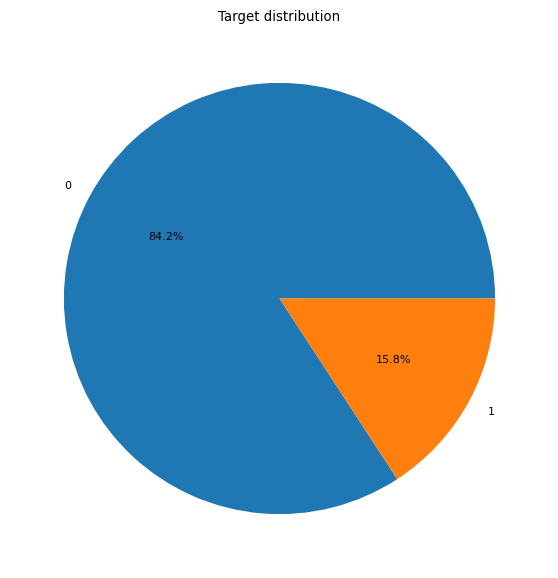

In [1105]:
plt.figure(figsize = (7,7))
plt.pie(result['target'].value_counts(), 
        labels = result['target'].value_counts().index, 
        autopct='%1.1f%%')
plt.title('Target distribution');


Виден дисбаланс классов, но не такой яркий, как у целевой переменной только у принятых заявок.

In [1106]:
# вещественные переменные
interval_features = result.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('uid')
interval_features.remove('target')
interval_features

['income',
 'count_active_credit_no_cc',
 'cnt_mnth_from_last_pmnt',
 'age',
 'experience',
 'inquiry_14_day',
 'inquiry_21_day',
 'count_mnth_act_passport',
 'ratio_experience',
 'ratio_income',
 'free_income',
 'ratio_credit']

In [1107]:
# категориальные переменные
categorical_features = result.select_dtypes(include=['object']).columns.tolist()
categorical_features

['income_type',
 'education_',
 'customer_category_',
 'dependant_number',
 'is_empl']

In [1108]:
# делим интервальные переменные на бины
for feature in interval_features:
    result[feature + '_bin'] = pd.qcut(result[feature], 30, duplicates='drop')
    result[feature + '_bin'] = result[feature + '_bin'].cat.add_categories(0).fillna(0)

for feature in categorical_features:
    result[feature] = result[feature].fillna("UNK")


In [1109]:
train_res, test_res = train_test_split(result,
                               test_size=0.3,
                               random_state=17,
                               stratify=result['target'])

In [1110]:
train_res

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income,free_income,ratio_credit,income_bin,count_active_credit_no_cc_bin,cnt_mnth_from_last_pmnt_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,ratio_experience_bin,ratio_income_bin,free_income_bin,ratio_credit_bin
35300,1,2NDFL,elementary,Unknown category,21616.0,0.0,0,1.0,0.793526,24.278689,4.653005,0.0,0.0,4.180328,37845,0.166292,0.665910,21616.0,0.041188,"(21021.667, 22630.4]","(-0.001, 1.0]","(0.759, 0.8]","(24.186, 24.437]","(4.624, 5.1]","(-0.001, 1.0]","(-0.001, 1.0]","(4.022, 4.247]","(0.161, 0.179]","(0.64, 0.682]","(20983.0, 22541.0]","(0.0405, 0.0416]"
16369,0,OTHER,elementary,Corporate,55755.0,0.0,1,0.0,NaN,26.483135,2.494094,0.0,0.0,6.422861,72657,0.094177,0.952004,55755.0,0.000000,"(53118.0, 58370.467]","(-0.001, 1.0]",0,"(26.29, 27.068]","(2.411, 2.693]","(-0.001, 1.0]","(-0.001, 1.0]","(5.902, 6.427]","(0.087, 0.0968]","(0.936, 1.002]","(53000.0, 58192.733]","(-0.001, 0.0192]"
11884,0,OTHER,elementary,Corporate,26564.0,0.0,1,0.0,0.796550,42.876712,0.527457,0.0,0.0,8.325271,52974,0.012302,0.453574,26564.0,0.000000,"(25329.0, 27000.0]","(-0.001, 1.0]","(0.759, 0.8]","(41.633, 43.336]","(0.497, 0.544]","(-0.001, 1.0]","(-0.001, 1.0]","(7.942, 8.421]","(0.0116, 0.0139]","(0.444, 0.477]","(25242.8, 26917.0]","(-0.001, 0.0192]"
10042,0,OTHER,elementary,Corporate,66686.0,0.0,1,1.0,0.982101,29.249315,3.786301,1.0,2.0,0.710929,44955,0.129449,1.138649,66686.0,0.034189,"(62561.4, 70000.0]","(-0.001, 1.0]","(0.924, 0.985]","(28.682, 29.456]","(3.778, 4.197]","(-0.001, 1.0]","(1.0, 2.0]","(0.636, 1.313]","(0.119, 0.132]","(1.131, 1.209]","(62358.267, 70000.0]","(0.0331, 0.0356]"
44,0,OTHER,advanced,Corporate,46507.0,0.0,1,0.0,NaN,45.813699,0.558904,1.0,1.0,0.774818,201,0.012199,0.794097,46507.0,0.000000,"(44608.2, 47075.433]","(-0.001, 1.0]",0,"(45.324, 47.436]","(0.544, 0.626]","(-0.001, 1.0]","(-0.001, 1.0]","(0.636, 1.313]","(0.0116, 0.0139]","(0.788, 0.844]","(44500.0, 47000.0]","(-0.001, 0.0192]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35220,0,OTHER,elementary,Corporate,29992.0,0.0,1,NaN,NaN,24.101370,0.509589,NaN,NaN,4.065753,36709,0.018410,0.873336,29992.0,NaN,"(28678.667, 30000.0]",0,0,"(23.912, 24.186]","(0.497, 0.544]",0,0,"(4.022, 4.247]","(0.0162, 0.0186]","(0.844, 0.873]","(28595.333, 30000.0]",0
21009,0,2NDFL,elementary,Corporate,27743.0,0.0,1,0.0,32.171013,38.134247,1.345205,0.0,0.0,10.200000,92586,0.035276,0.473706,27743.0,0.000000,"(27000.0, 28678.667]","(-0.001, 1.0]","(20.213, 32.811]","(37.447, 38.777]","(1.34, 1.516]","(-0.001, 1.0]","(-0.001, 1.0]","(10.105, 10.434]","(0.034, 0.0387]","(0.444, 0.477]","(26917.0, 28595.333]","(-0.001, 0.0192]"
5368,0,2NDFL,advanced,Unknown category,55164.0,0.0,0,0.0,0.984140,27.756164,1.958904,2.0,2.0,7.476712,24019,0.070575,0.947386,55164.0,0.000000,"(53118.0, 58370.467]","(-0.001, 1.0]","(0.924, 0.985]","(27.068, 27.861]","(1.919, 2.144]","(1.0, 2.0]","(1.0, 2.0]","(7.428, 7.942]","(0.0701, 0.0783]","(0.936, 1.002]","(53000.0, 58192.733]","(-0.001, 0.0192]"
31046,0,OTHER,elementary,Corporate,20412.0,0.0,1,1.0,0.661604,25.559316,0.480874,0.0,0.0,2.510001,137218,0.018814,0.348530,20412.0,0.039125,"(19738.267, 21021.667]","(-0.001, 1.0]","(0.606, 0.663]","(25.5, 26.29]","(0.421, 0.497]","(-0.001, 1.0]","(-0.001, 1.0]","(2.02, 2.65]","(0.0186, 0.0216]","(0.344, 0.38]","(19645.467, 20983.0]","(0.0383, 0.0405]"


In [1111]:
result

,target,income_type,education_,customer_category_,income,dependant_number,is_empl,count_active_credit_no_cc,cnt_mnth_from_last_pmnt,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,uid,ratio_experience,ratio_income,free_income,ratio_credit,income_bin,count_active_credit_no_cc_bin,cnt_mnth_from_last_pmnt_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin,ratio_experience_bin,ratio_income_bin,free_income_bin,ratio_credit_bin
0,0,2NDFL,elementary,Unknown category,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,0.0,0.0,5.536986,10,0.042152,0.965951,56245.0,NaN,"(53118.0, 58370.467]",0,0,"(49.702, 52.14]","(1.919, 2.144]","(-0.001, 1.0]","(-0.001, 1.0]","(5.441, 5.902]","(0.0387, 0.0439]","(0.936, 1.002]","(53000.0, 58192.733]",0
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11,0.072109,2.040607,119510.0,0.035471,"(100003.2, 126142.4]","(-0.001, 1.0]","(1.114, 1.184]","(27.861, 28.682]","(1.919, 2.144]","(-0.001, 1.0]","(-0.001, 1.0]","(7.942, 8.421]","(0.0701, 0.0783]","(1.812, 2.206]","(100000.0, 125919.8]","(0.0331, 0.0356]"
2,0,2NDFL,advanced,Unknown category,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13,0.486625,0.206431,12020.0,0.027444,"(-0.001, 13624.267]","(-0.001, 1.0]","(0.272, 0.312]","(36.208, 37.447]","(16.334, 40.805]","(-0.001, 1.0]","(-0.001, 1.0]","(8.846, 9.207]","(0.387, 0.732]","(-0.001, 0.258]","(-0.001, 13509.6]","(0.0262, 0.0285]"
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,0.0,0.0,7.972678,15,0.051346,0.369003,21611.0,NaN,"(21021.667, 22630.4]",0,0,"(33.028, 34.024]","(1.71, 1.919]","(-0.001, 1.0]","(-0.001, 1.0]","(7.942, 8.421]","(0.0495, 0.0556]","(0.344, 0.38]","(20983.0, 22541.0]",0
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17,0.015813,0.478516,146841.0,0.000000,"(126142.4, 173509.5]","(-0.001, 1.0]","(20.213, 32.811]","(36.208, 37.447]","(0.544, 0.626]","(-0.001, 1.0]","(-0.001, 1.0]","(7.428, 7.942]","(0.0139, 0.0162]","(0.477, 0.512]","(125919.8, 172704.0]","(-0.001, 0.0192]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43242,1,2NDFL,advanced,Unknown category,24311.0,0.0,0,NaN,NaN,23.456284,1.188060,NaN,NaN,3.401639,140863,0.028569,0.748933,24311.0,NaN,"(24290.0, 25329.0]",0,0,"(23.26, 23.59]","(1.176, 1.34]",0,0,"(3.281, 3.533]","(0.0254, 0.0296]","(0.71, 0.754]","(24177.0, 25242.8]",0
43243,1,OTHER,elementary,Unknown category,21400.0,0.0,0,0.0,1.271550,24.040984,0.994303,0.0,0.0,2.739509,140864,0.037181,0.659256,21400.0,0.000000,"(21021.667, 22630.4]","(-0.001, 1.0]","(1.184, 1.311]","(23.912, 24.186]","(0.88, 1.025]","(-0.001, 1.0]","(-0.001, 1.0]","(2.65, 3.022]","(0.034, 0.0387]","(0.64, 0.682]","(20983.0, 22541.0]","(-0.001, 0.0192]"
43244,0,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623,0.568531,1.0,1.0,4.377049,140869,0.016407,0.656108,22532.0,0.040912,"(21021.667, 22630.4]","(-0.001, 1.0]","(0.566, 0.606]","(24.437, 24.683]","(0.544, 0.626]","(-0.001, 1.0]","(-0.001, 1.0]","(4.247, 4.481]","(0.0162, 0.0186]","(0.64, 0.682]","(20983.0, 22541.0]","(0.0405, 0.0416]"
43245,1,OTHER,elementary,Unknown category,21750.0,0.0,0,NaN,NaN,23.218579,0.742039,NaN,NaN,3.002313,140885,0.026997,0.670038,21750.0,NaN,"(21021.667, 22630.4]",0,0,"(0.0017299999999999998, 23.26]","(0.626, 0.744]",0,0,"(2.65, 3.022]","(0.0254, 0.0296]","(0.64, 0.682]","(20983.0, 22541.0]",0


In [1112]:
scorecard_full = pd.DataFrame()

In [1113]:
for feature in interval_features:

    df, iv = calculate_woe_iv(train_res, feature + '_bin', 'target')
    df['feature'] = feature
    train_res = train_res.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train_res = train_res.rename(columns={'WoE':'WoE'+'_'+feature})

    train_res = train_res.drop(columns = [feature, feature + '_bin', 'Value'])

    test_res = test_res.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test_res = test_res.rename(columns={'WoE':'WoE'+'_'+feature})


    test_res = test_res.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard_full = pd.concat([scorecard_full, df[['feature', 'Value', 'WoE']]])
    print('feature', feature, '  IV= ',iv)

income_bin
feature income   IV=  0.30626895439101
count_active_credit_no_cc_bin
feature count_active_credit_no_cc   IV=  0.008292261747075936
cnt_mnth_from_last_pmnt_bin
feature cnt_mnth_from_last_pmnt   IV=  0.11690148695606795
age_bin
feature age   IV=  3.07646509235934
experience_bin
feature experience   IV=  0.7822098538416823
inquiry_14_day_bin
feature inquiry_14_day   IV=  0.27567413669608426
inquiry_21_day_bin
feature inquiry_21_day   IV=  0.28133798754934974
count_mnth_act_passport_bin
feature count_mnth_act_passport   IV=  2.087927320353724
ratio_experience_bin
feature ratio_experience   IV=  0.7265086573820154
ratio_income_bin
feature ratio_income   IV=  0.31431677319778095
free_income_bin
feature free_income   IV=  0.304663908071333
ratio_credit_bin
feature ratio_credit   IV=  0.7354532447600444


In [1114]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train_res, feature , 'target')
    df['feature'] = feature
    train_res = train_res.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train_res = train_res.rename(columns={'WoE':'WoE'+'_'+feature})
    
    train_res = train_res.drop(columns = [feature, 'Value'])

    test_res = test_res.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test_res = test_res.rename(columns={'WoE':'WoE'+'_'+feature})
    
    test_res = test_res.drop(columns = [feature, 'Value'])
    
    scorecard_full = pd.concat([scorecard_full, df[['feature', 'Value', 'WoE']]])


    print('feature', feature, '  IV= ',iv)
    

income_type
feature income_type   IV=  0.153599527913696
education_
feature education_   IV=  0.055507234623537044
customer_category_
feature customer_category_   IV=  0.1562136628009797
dependant_number
feature dependant_number   IV=  0.032810754776039695
is_empl
feature is_empl   IV=  0.17601900241002794


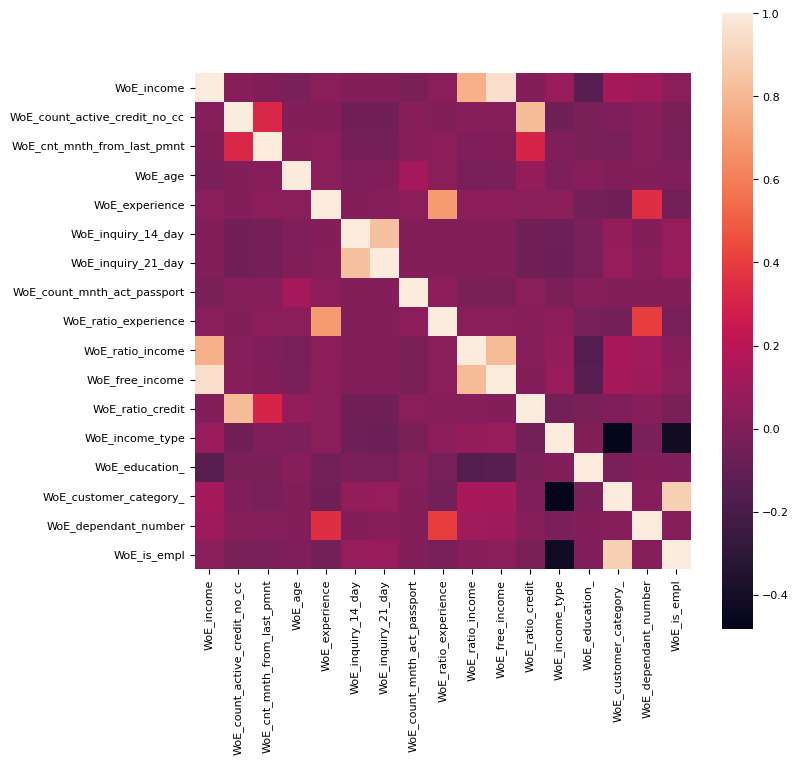

In [1115]:
# импорт библиотек для графиков
# матрица корреляций
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True)
plt.show()

In [1116]:
features_full = test.columns.tolist()
features_full.remove('uid')
features_full.remove('target')
# # исключаем, так как IV<0.02
features_full.remove('WoE_count_active_credit_no_cc')

# исключим inquiry_14_day, так как коррелирует с inquiry_21_day,
# при этом IV у inquiry_21_day выше
features_full.remove('WoE_inquiry_14_day')

# # исключаем WoE_CUSTOMER_CATEGORY_, так как коррелирует с WoE_is_EMPL
# # при этом IV у WoE_is_EMPL выше
features_full.remove('WoE_customer_category_')

# исключаем, так как коррелирует experience с ratio_experience
# при этом IV у experience выше
features_full.remove('WoE_ratio_experience')

# исключаем, так как коррелирует income с free_income, у income IV больше
features_full.remove('WoE_free_income')
features_full.remove('predictions_01')
# features
features_full

['WoE_income',
 'WoE_cnt_mnth_from_last_pmnt',
 'WoE_age',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_ratio_income',
 'WoE_ratio_credit',
 'WoE_income_type',
 'WoE_education_',
 'WoE_dependant_number',
 'WoE_is_empl']

In [1117]:
# logistic regression
X_train_res = train_res[features_full]
X_test_res = test_res[features_full]
y_train_res = train_res['target']
y_test_res = test_res['target']

logreg_full = LogisticRegression()
logreg_full.fit(X_train_res, y_train_res)


LogisticRegression()

In [1118]:
features_coefs_full = pd.DataFrame(zip(X_train_res.columns, np.transpose(logreg_full.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg_full.intercept_
print('intercept=', intercept)
features_coefs_full

intercept= [-1.55946482]


,features,coef
0,WoE_income,-0.471250
1,WoE_cnt_mnth_from_last_pmnt,-1.450219
2,WoE_age,-1.457648
3,WoE_experience,-0.349396
4,WoE_inquiry_21_day,1.850030
5,WoE_count_mnth_act_passport,-0.313768
6,WoE_ratio_income,-0.791088
7,WoE_ratio_credit,0.273025
8,WoE_income_type,0.474250
9,WoE_education_,-0.354612


In [1119]:
y_pred_full = logreg_full.predict(X_test_res)

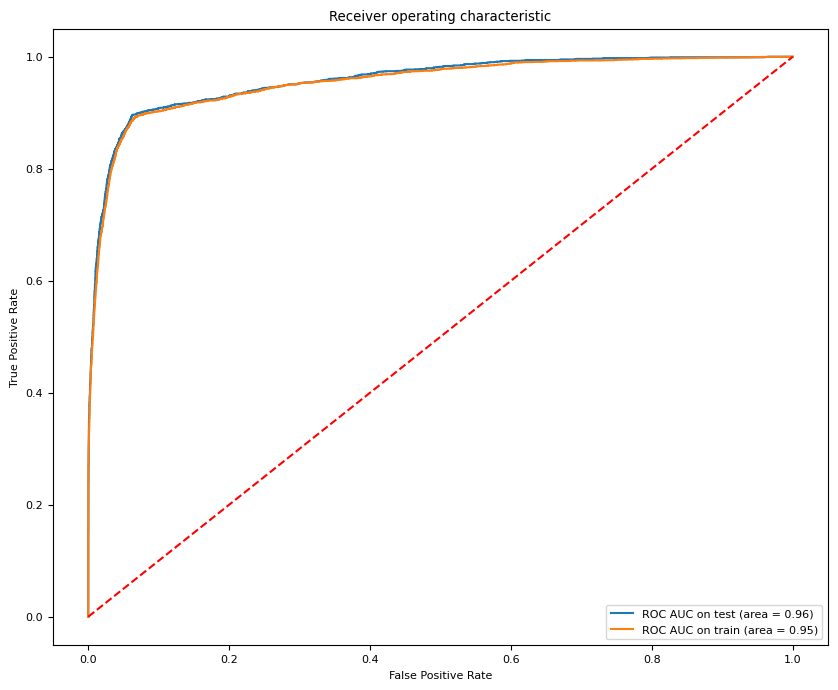

In [1120]:
plt.rc("font", size=8)


logit_roc_auc = roc_auc_score(y_test_res, logreg_full.predict_proba(X_test_res)[:,1])
fpr, tpr, thresholds = roc_curve(y_test_res, logreg_full.predict_proba(X_test_res)[:,1])



logit_roc_auc_train = roc_auc_score(y_train_res, logreg_full.predict_proba(X_train_res)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, logreg_full.predict_proba(X_train_res)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='ROC AUC on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='ROC AUC on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC AUC и ROC Curve объединенной модели сильно ближе к идеальному классификатору.

In [1121]:
fpr, tpr, thresholds = roc_curve(y_train_res, logreg_full.predict_proba(X_train_res)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.200008, G-Mean=1.351


In [1122]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99980383, 0.9998823 ,
       1.        ])

In [1123]:
# калибровка
scorecard_full['features'] = 'WoE_'+scorecard_full['feature'].astype(str)
scorecard_full = scorecard_full.merge(features_coefs_full,how='inner', on='features')
scorecard_full = scorecard_full.drop(columns = 'features')
scorecard_full

,feature,Value,WoE,coef
0,income,"(-0.001, 13624.267]",-0.692101,-0.471250
1,income,0,-0.652161,-0.471250
2,income,"(13624.267, 15947.267]",-0.632785,-0.471250
3,income,"(21021.667, 22630.4]",-0.551172,-0.471250
4,income,"(25329.0, 27000.0]",-0.501583,-0.471250
...,...,...,...,...
215,dependant_number,0.0,0.005376,-1.748359
216,dependant_number,1.0,0.371825,-1.748359
217,dependant_number,2.0,2.060110,-1.748359
218,is_empl,0,-0.314524,-4.290081


In [1124]:
pdo = 20
Target_Odds = 50
Target_Score = 600

Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)

28.85390081777927 487.1228762045055


In [1125]:
scorecard_full['score'] = (-1)*(scorecard_full['coef']*scorecard_full['WoE'] + intercept/13)*Factor + Offset/13
scorecard_full['score'] = scorecard_full['score'].round(0)
scorecard_full['WoE'] = scorecard_full['WoE'].round(2)
scorecard_full['coef'] = scorecard_full['coef'].round(2)
scorecard_full

,feature,Value,WoE,coef,score
0,income,"(-0.001, 13624.267]",-0.69,-0.47,32.0
1,income,0,-0.65,-0.47,32.0
2,income,"(13624.267, 15947.267]",-0.63,-0.47,32.0
3,income,"(21021.667, 22630.4]",-0.55,-0.47,33.0
4,income,"(25329.0, 27000.0]",-0.50,-0.47,34.0
...,...,...,...,...,...
215,dependant_number,0.0,0.01,-1.75,41.0
216,dependant_number,1.0,0.37,-1.75,60.0
217,dependant_number,2.0,2.06,-1.75,145.0
218,is_empl,0,-0.31,-4.29,2.0


In [1126]:
from sklearn.metrics import classification_report
report = classification_report(y_test_res, y_pred_full, target_names=['1', '0'])
print(report)

              precision    recall  f1-score   support

           1       0.96      0.97      0.97     10924
           0       0.84      0.78      0.81      2051

    accuracy                           0.94     12975
   macro avg       0.90      0.88      0.89     12975
weighted avg       0.94      0.94      0.94     12975



Интерпретация метрик:

- Precision (точность) для класса 1 (1): 0.96. Это означает, что 96% объектов, отнесенных к классу 1, действительно принадлежат к этому классу.
- Recall (полнота) для класса 1 (1): 0.97. Это означает, что модель правильно классифицировала 97% объектов класса 1 из общего числа объектов класса 1.
- F1-score для класса 1 (1): 0.97. F1-score является средним гармоническим между точностью и полнотой и характеризует сбалансированность между ними.
- Support для класса 1 (1): 10924. Это количество объектов класса 1 в тестовом наборе данных.

- Precision для класса 0 (0): 0.84. Это означает, что 84% объектов, отнесенных к классу 0, действительно принадлежат к этому классу.
- Recall для класса 0 (0): 0.78. Это означает, что модель правильно классифицировала 78% объектов класса 0 из общего числа объектов класса 0.
- F1-score для класса 0 (0): 0.81.
- Support для класса 0 (0): 2051. Это количество объектов класса 0 в тестовом наборе данных.

В данном случае, модель показывает хорошие результаты для обоих классов, хотя точность и полнота чуть выше для класса 1. F1-мера также достаточно высокая для обоих классов, что свидетельствует о хорошем балансе между точностью и полнотой. В целом, это хорошие показатели качества модели классификации.

# Сравнение моделей

Если важны оба класса и необходимо достичь баланса между precision и recall, то модель с более высокими значениями F1-score для обоих классов может быть предпочтительнее. 

С учетом этого, общая модель на одобренных и отклоненных заявках может быть более подходящим выбором для внедрения в продакшен, так как имеет более высокий F1-score для обоих классов. 

# Рекомендации по мониторингу
1. Постоянно отслеживать метрику recall, чтобы убедиться, что модель не пропускает слишком много объектов дефолта, что может привести к увеличению финансовых рисков.

2. F1-score для класса 1 равен 0.97, что указывает на хороший баланс между точностью и полнотой. Однако, следует продолжать мониторить этот показатель, чтобы убедиться, что он остается на приемлемом уровне.

3. Важно также следить за метриками для класса 0 (не дефолт), чтобы убедиться, что модель корректно идентифицирует объекты этого класса. Полнота для класса 0 равна 0.78, что может говорить о возможности улучшения модели в области определения объектов не дефолта.

4. Важно регулярно обновлять данные, на которых обучается модель, чтобы она оставалась актуальной и способной адаптироваться к новым обстоятельствам.

5. Проведение регулярного тестирования модели на новых данных и анализа результатов, чтобы убедиться в ее эффективности и надежности.
6. Важно следить за балансом классов целевой переменной, так как он сильно влияет на метрики, что видно при сравнении моделей.
